

<center><img src="http://netcodingdata.com/uploads/29b7da89-65a4-460f-82b3-06232219ef8b/Credit_Card_Customer_Churn_Prediction.jpg" width="500" height="600"></center>

<b><h1><center><span style='background :lightblue' >Feature Selection, Model Selection and Tuning
</span></center></h1></b>

<h2><center><span style='background :teal' >Credit card Users Churn Prediction</span></center></h2>

## Context <a class="anchor" id="context"></a>

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

As a Data Scientist, need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Objective

To predict the best possible model that will give the required performance

## Data Dictionary <a class="anchor" id="data-dic"></a>

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level:  Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to a college student), Post-Graduate, Doctorate.
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts between the customer and bank in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: The balance that carries over from one month to the next is the revolving balance
* Avg_Open_To_Buy: Open to Buy refers to the amount left on the credit card to use (Average of last 12 months)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter
* Total_Amt_Chng_Q4_Q1: Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter
* Avg_Utilization_Ratio: Represents how much of the available credit the customer spent

In [3]:
import warnings

warnings.filterwarnings("ignore")
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries to tune model, get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler

# To do hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)

# To impute missing values
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

#libraries to help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier)
from xgboost import XGBClassifier

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# to suppress scientific notations
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Understanding the structure of the Data <a class="anchor" id="data-under"></a>

In [4]:
bank_churn = pd.read_csv('BankChurners.csv')

In [5]:
# copying data to another varaible to avoid any changes to original data
data = bank_churn.copy()

In [6]:
data.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School            NaN  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3     12691.000                  777        11914.000   
1                      2      8256.000                  864         7392.000   
2                      0      3418.000                    0         3418.000   
3                      1      3313.000                 2517          796.000   
4                      0      4716.000                    0         4716.000   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  
0                  0.061  
1                  0.105  
2                  0.000  
3                  0.760  
4                  0.000

In [7]:
data.tail()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
10122        Graduate         Single     $40K - $60K          Blue   
10123             NaN       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate            NaN     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
10122              40                         3                       2   
10123              25                         4                       2   
10124              36                         5                       3   
10125              36                         4                       3   
10126              25                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
10122                      3      4003.000                 1851   
10123                      3      4277.000                 2186   
10124                      4      5409.000                    0   
10125                      3      5281.000                    0   
10126                      4     10388.000                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
10122         2152.000                 0.703            15476             117   
10123         2091.000                 0.804             8764              69   
10124         5409.000                 0.819            10291              60   
10125         5281.000                 0.535             8395              62   
10126         8427.000                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
10122                0.857                  0.462  
10123                0.683                  0.511  
10124                0.818                  0.000  
10125                0.722                  0.000  
10126                0.649                  0.189

In [8]:
data.shape

(10127, 21)

* The dataset has 10127 rows and 21 columns

In [9]:
# Sample of the data
data.sample(n=10, random_state=1)

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
6498  712389108  Existing Customer            43      F                2   
9013  718388733  Existing Customer            38      F                1   
2053  710109633  Existing Customer            39      M                2   
3211  717331758  Existing Customer            44      M                4   
5559  709460883  Attrited Customer            38      F                2   
6106  789105183  Existing Customer            54      M                3   
4150  771342183  Attrited Customer            53      F                3   
2205  708174708  Existing Customer            38      M                4   
4145  718076733  Existing Customer            43      M                1   
5324  821889858  Attrited Customer            50      F                1   

     Education_Level Marital_Status Income_Category Card_Category  \
6498        Graduate        Married  Less than $40K          Blue   
9013         College            NaN  Less than $40K          Blue   
2053         College        Married     $60K - $80K          Blue   
3211        Graduate        Married         $120K +          Blue   
5559       Doctorate        Married  Less than $40K          Blue   
6106   Post-Graduate         Single    $80K - $120K        Silver   
4150        Graduate         Single     $40K - $60K          Blue   
2205        Graduate        Married     $40K - $60K          Blue   
4145        Graduate         Single     $60K - $80K        Silver   
5324       Doctorate         Single             abc          Blue   

      Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
6498              36                         6                       3   
9013              32                         2                       3   
2053              31                         6                       3   
3211              32                         6                       3   
5559              28                         5                       2   
6106              42                         3                       1   
4150              40                         6                       3   
2205              27                         6                       2   
4145              31                         4                       3   
5324              46                         6                       4   

      Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
6498                      2      2570.000                 2107   
9013                      3      2609.000                 1259   
2053                      2      9871.000                 1061   
3211                      4     34516.000                 2517   
5559                      4      1614.000                    0   
6106                      2     34516.000                 2488   
4150                      2      1625.000                    0   
2205                      4      5535.000                 1276   
4145                      3     25824.000                 1170   
5324                      3      1970.000                 1477   

      Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
6498          463.000                 0.651             4058              83   
9013         1350.000                 0.871             8677              96   
2053         8810.000                 0.545             1683              34   
3211        31999.000                 0.765             4228              83   
5559         1614.000                 0.609             2437              46   
6106        32028.000                 0.552             4401              87   
4150         1625.000                 0.689             2314              43   
2205         4259.000                 0.636             1764              38   
4145        24654.000                 0.684             3101              73   
5324          493.000                 0.662             2493       

In [10]:
data[data.duplicated()].count()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [11]:
# Dropping the customer id column as it does not add any value to the analysis
data.drop("CLIENTNUM", axis=1, inplace=True)

* CLIENTNUM: It is a unique identifier for customers and can be dropped as it wouldn't add any information to our analysis.

In [12]:
# checking missing values
data.isnull().sum().sort_values()

Attrition_Flag                 0
Total_Trans_Ct                 0
Total_Trans_Amt                0
Total_Amt_Chng_Q4_Q1           0
Avg_Open_To_Buy                0
Total_Revolving_Bal            0
Credit_Limit                   0
Contacts_Count_12_mon          0
Months_Inactive_12_mon         0
Total_Relationship_Count       0
Months_on_book                 0
Card_Category                  0
Income_Category                0
Dependent_count                0
Gender                         0
Customer_Age                   0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
Marital_Status               749
Education_Level             1519
dtype: int64

In [13]:
data.nunique().sort_values()

Attrition_Flag                 2
Gender                         2
Marital_Status                 3
Card_Category                  4
Income_Category                6
Total_Relationship_Count       6
Dependent_count                6
Education_Level                6
Months_Inactive_12_mon         7
Contacts_Count_12_mon          7
Months_on_book                44
Customer_Age                  45
Total_Trans_Ct               126
Total_Ct_Chng_Q4_Q1          830
Avg_Utilization_Ratio        964
Total_Amt_Chng_Q4_Q1        1158
Total_Revolving_Bal         1974
Total_Trans_Amt             5033
Credit_Limit                6205
Avg_Open_To_Buy             6813
dtype: int64

In [14]:
# checking column datatypes and number of non-null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           8608 non-null   object 
 5   Marital_Status            9378 non-null   object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

* There are null values in the Education_Level and Marital_Status
* There are 6 columns are of object data type and the rest all are numerical.

In [15]:
# Checking the statistical summary of the variables.
data.describe(include="object").T

count unique                top  freq
Attrition_Flag   10127      2  Existing Customer  8500
Gender           10127      2                  F  5358
Education_Level   8608      6           Graduate  3128
Marital_Status    9378      3            Married  4687
Income_Category  10127      6     Less than $40K  3561
Card_Category    10127      4               Blue  9436

### Observation

* Attrition_Flag has 2 unique values with maximum values in "Existing Customer" 
* Gender also has 2 unique values with more female customer than male. But both category has almost equal values.
* Graduate is more frequent in "Education_Level" feature with total of 6 unique values.
* Marital status have 3 unique values with married category in high count
* Income category has 6 unique values and card category has 4 unique values. 

In [16]:
# Checking the statistical summary of the numerical variables.
data.describe().T

count     mean      std      min      25%  \
Customer_Age             10127.000   46.326    8.017   26.000   41.000   
Dependent_count          10127.000    2.346    1.299    0.000    1.000   
Months_on_book           10127.000   35.928    7.986   13.000   31.000   
Total_Relationship_Count 10127.000    3.813    1.554    1.000    3.000   
Months_Inactive_12_mon   10127.000    2.341    1.011    0.000    2.000   
Contacts_Count_12_mon    10127.000    2.455    1.106    0.000    2.000   
Credit_Limit             10127.000 8631.954 9088.777 1438.300 2555.000   
Total_Revolving_Bal      10127.000 1162.814  814.987    0.000  359.000   
Avg_Open_To_Buy          10127.000 7469.140 9090.685    3.000 1324.500   
Total_Amt_Chng_Q4_Q1     10127.000    0.760    0.219    0.000    0.631   
Total_Trans_Amt          10127.000 4404.086 3397.129  510.000 2155.500   
Total_Trans_Ct           10127.000   64.859   23.473   10.000   45.000   
Total_Ct_Chng_Q4_Q1      10127.000    0.712    0.238    0.000    0.582   
Avg_Utilization_Ratio    10127.000    0.275    0.276    0.000    0.023   

                              50%       75%       max  
Customer_Age               46.000    52.000    73.000  
Dependent_count             2.000     3.000     5.000  
Months_on_book             36.000    40.000    56.000  
Total_Relationship_Count    4.000     5.000     6.000  
Months_Inactive_12_mon      2.000     3.000     6.000  
Contacts_Count_12_mon       2.000     3.000     6.000  
Credit_Limit             4549.000 11067.500 34516.000  
Total_Revolving_Bal      1276.000  1784.000  2517.000  
Avg_Open_To_Buy          3474.000  9859.000 34516.000  
Total_Amt_Chng_Q4_Q1        0.736     0.859     3.397  
Total_Trans_Amt          3899.000  4741.000 18484.000  
Total_Trans_Ct             67.000    81.000   139.000  
Total_Ct_Chng_Q4_Q1         0.702     0.818     3.714  
Avg_Utilization_Ratio       0.176     0.503     0.999

#### Observations

* Customer_Age: Average age of customers is 46 years, range from 26 to 73 years.
* Dependent_count: On average the customers in the data have 2 dependents and a maximum of 5 dependents.
* Months_on_book: All the customers of the bank have at least been with them for a year(12 months) and 50% of the customers for at least 40 months.
* Total_Relationship_Count: All customers use at least one product of the bank, whereas 75% of customers use 5 or fewer products of the bank.
* Months_Inactive_12_mon: On average customers were inactive for two months in the past 12 months 
* Contacts_Count_12_mon: On average bank and customers interacted twice in the past 12 months.
* Credit_Limit: The range of credit limit is very wide from 1438 to 34516, customers with high credit limit might be outliers.
* Total_Revolving_Bal: Average revolving balance of customers is 1162, there's not much difference in the third quartile and maximum value.
* Avg_Open_To_Buy: Average amount that goes unused by the customers is 7469, the range is very wide for this variable and the extreme values(min and max) might be outliers.
* Total_Amt_Chng_Q4_Q1: For 75% of the customers the transaction amount in Q4 was less than the transaction amount in Q1.
* Total_Trans_Amt: Big difference between 3rd and 4th quartile. Average transaction amount of last 12 months is 4404, some customers spent as little as 510 while some customers made the transaction of more than 18k.
* Total_Trans_Ct: On average customers made 64 or fewer transactions while 75% of the customers made 81 transactions.
* Total_Ct_Chng_Q4_Q1: For 75% of the customers the number of transactions in Q4 was less than the transactions made in Q1.
* Avg_Utilization_Ratio: On average customers used ~27% of the available credit amount of their card, with 75% of the customers utilizing 50% or less of their available credit amount.

## Data Preprocessing <a class="anchor" id="data-pre"></a>

### Fixing the data types

In [17]:
category_col = ['Attrition_Flag','Gender','Education_Level','Marital_Status','Income_Category','Card_Category']
data[category_col] = data[category_col].astype('category')

#checking the new data and memory usage
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  category
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  int64   
 4   Education_Level           8608 non-null   category
 5   Marital_Status            9378 non-null   category
 6   Income_Category           10127 non-null  category
 7   Card_Category             10127 non-null  category
 8   Months_on_book            10127 non-null  int64   
 9   Total_Relationship_Count  10127 non-null  int64   
 10  Months_Inactive_12_mon    10127 non-null  int64   
 11  Contacts_Count_12_mon     10127 non-null  int64   
 12  Credit_Limit              10127 non-null  float64 
 13  Total_Revolving_Bal       10127 non-null  int6

**Because of the Catefory conversion the memory usage reduced to around 1.1 MB from around 1.5 KB**

In [18]:
data.describe(include=["category"]).T

count unique                top  freq
Attrition_Flag   10127      2  Existing Customer  8500
Gender           10127      2                  F  5358
Education_Level   8608      6           Graduate  3128
Marital_Status    9378      3            Married  4687
Income_Category  10127      6     Less than $40K  3561
Card_Category    10127      4               Blue  9436

In [19]:
for i in category_col:
    print("Unique values in", i, "are :")
    print(data[i].value_counts())
    print("*" * 50)

Unique values in Attrition_Flag are :
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
**************************************************
Unique values in Gender are :
F    5358
M    4769
Name: Gender, dtype: int64
**************************************************
Unique values in Education_Level are :
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
**************************************************
Unique values in Marital_Status are :
Married     4687
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64
**************************************************
Unique values in Income_Category are :
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: Income_Category, dtype: int64
**************************************************

#### Observations

* Most of the records are for existing customers.
* Most of the bank's customers are female
* Most customers are graduates.
* Most customers are married.
* Most customers lie in the income group of less than $40k
* Most customers have a blue card.
* The data is imbalanced with 85% and 15%

#### Missing values

* 'abc' value of Income_Category can be considered and treated as missing values.

In [20]:
data['Income_Category'].replace('abc',np.nan,inplace = True )

In [21]:
data.isna().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

## Exploratory Data Analysis <a class="anchor" id="eda"></a>

## Univariate Analysis

In [22]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [23]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [24]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  category
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  int64   
 4   Education_Level           8608 non-null   category
 5   Marital_Status            9378 non-null   category
 6   Income_Category           9015 non-null   category
 7   Card_Category             10127 non-null  category
 8   Months_on_book            10127 non-null  int64   
 9   Total_Relationship_Count  10127 non-null  int64   
 10  Months_Inactive_12_mon    10127 non-null  int64   
 11  Contacts_Count_12_mon     10127 non-null  int64   
 12  Credit_Limit              10127 non-null  float64 
 13  Total_Revolving_Bal       10127 non-null  int6

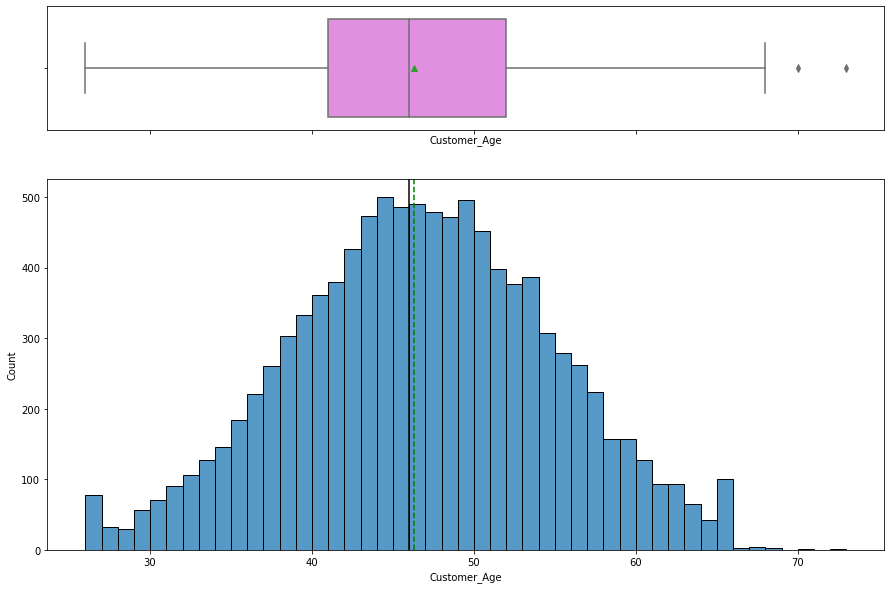

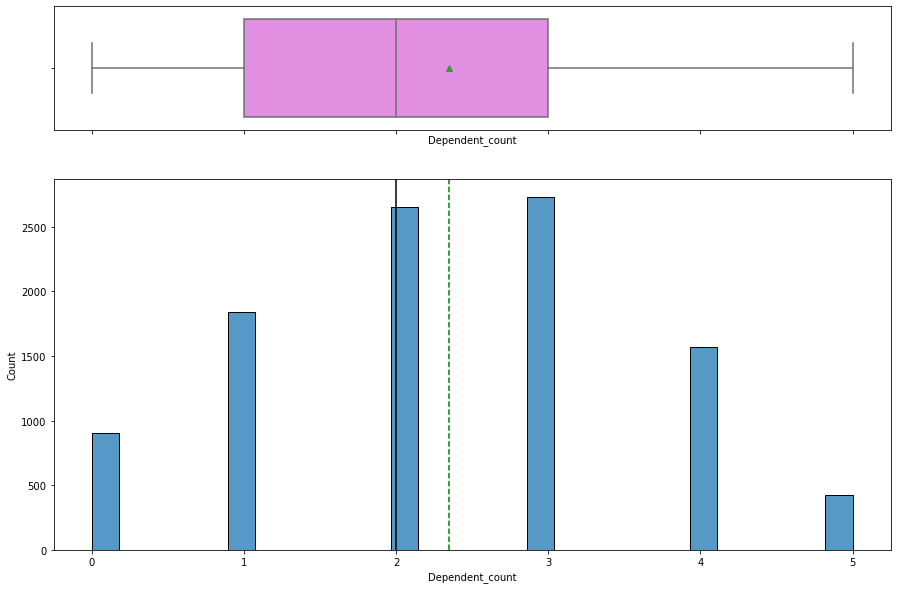

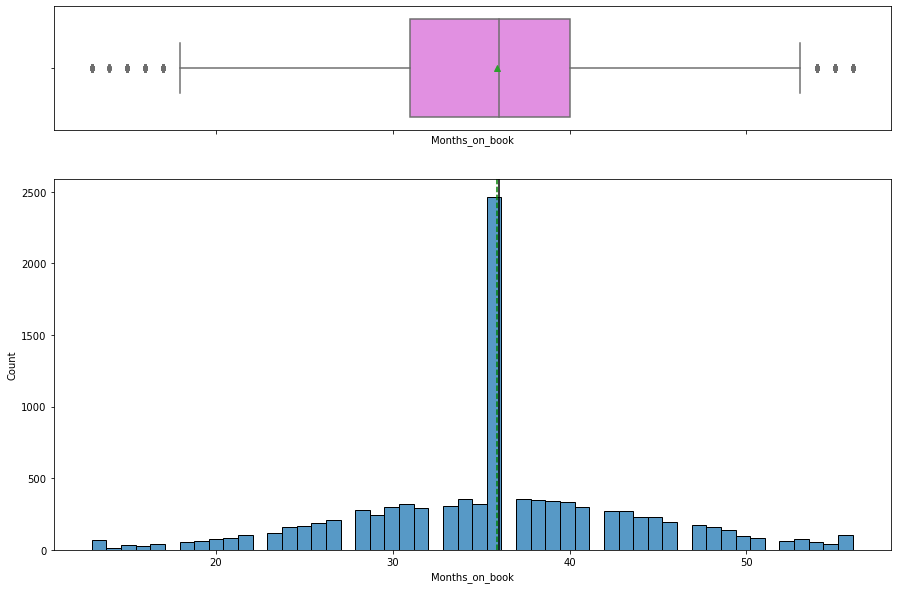

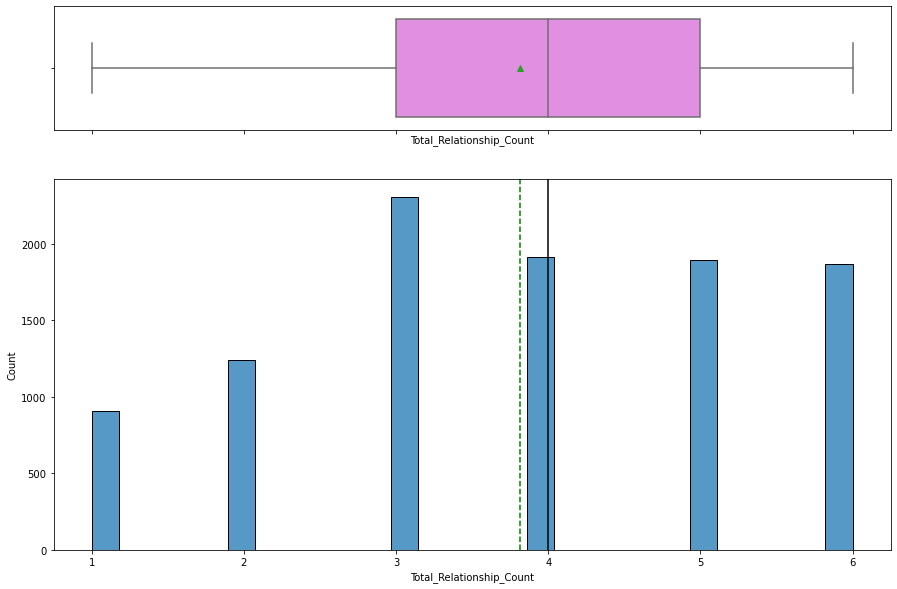

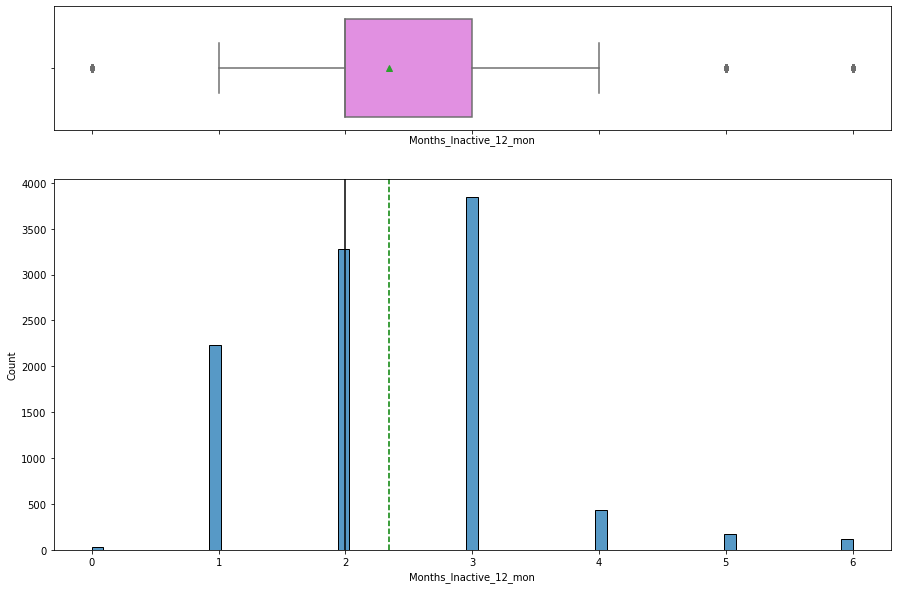

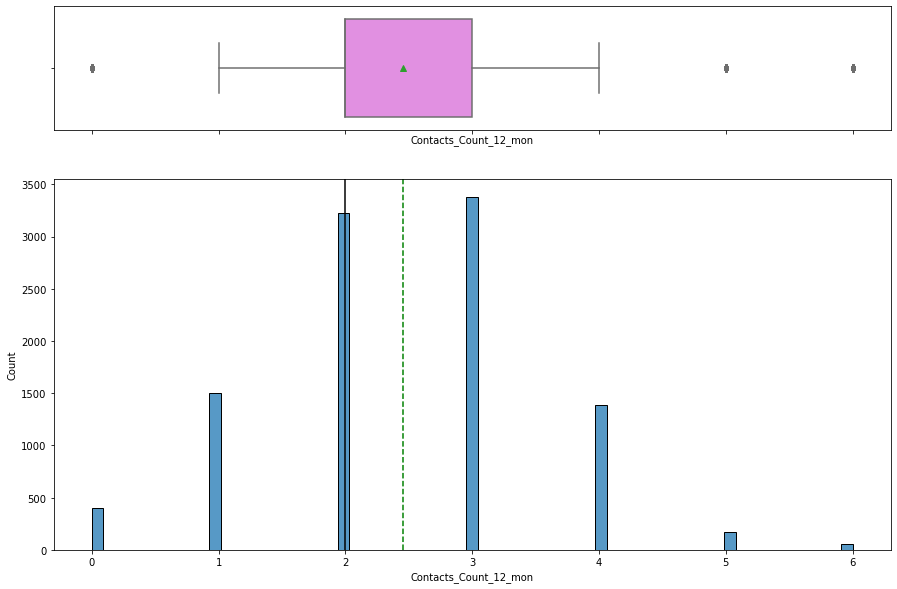

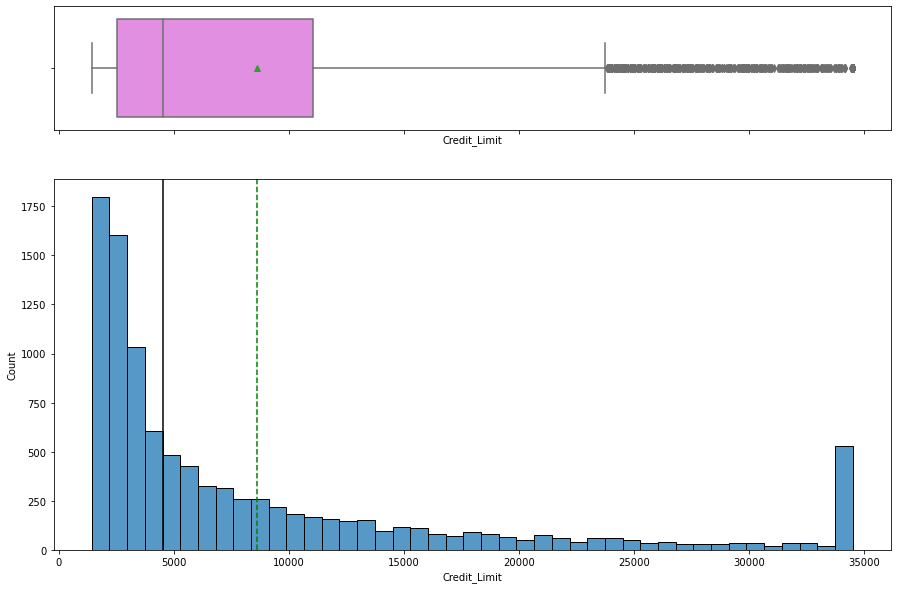

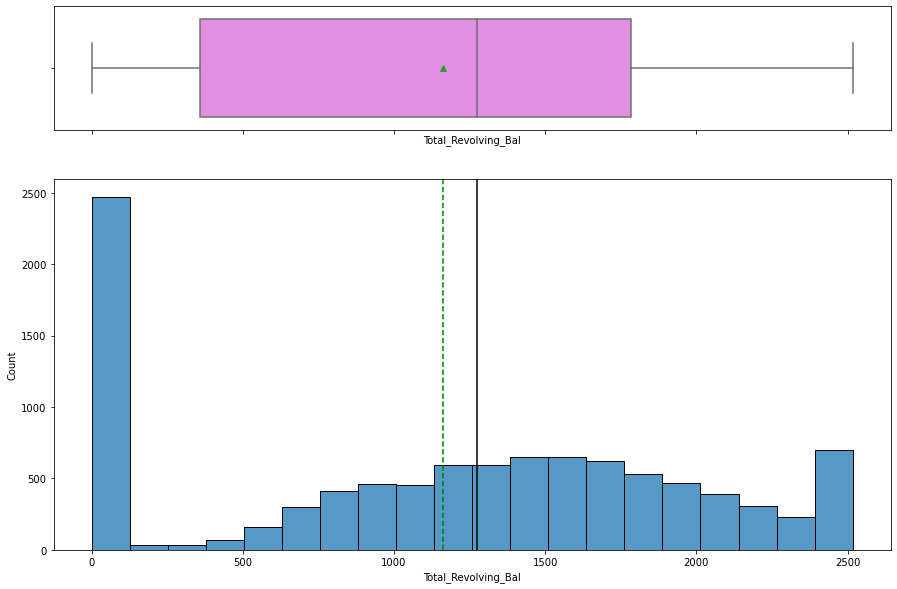

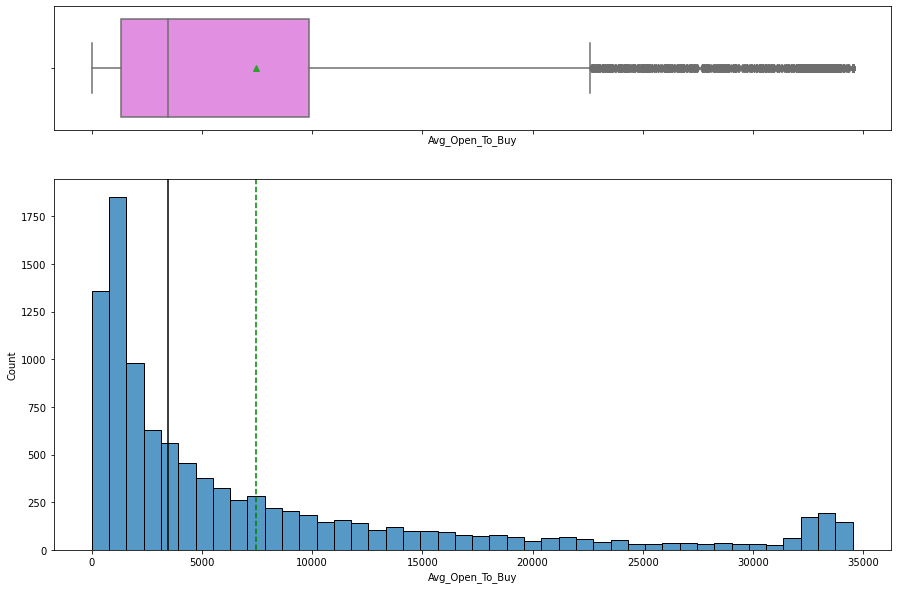

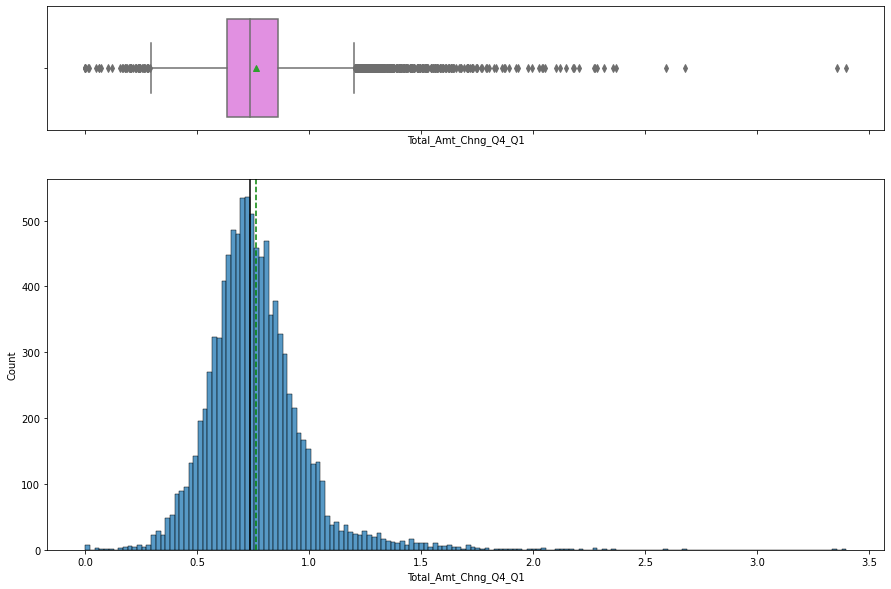

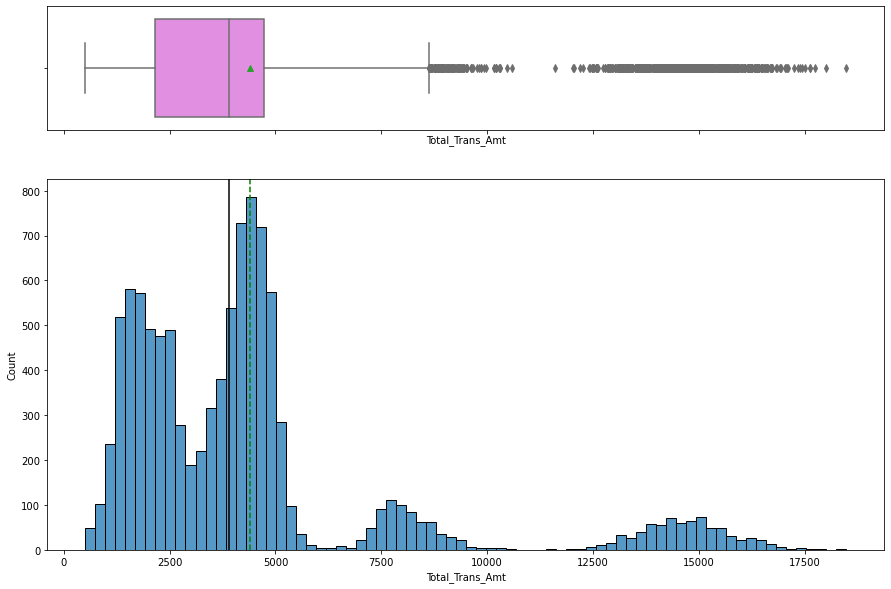

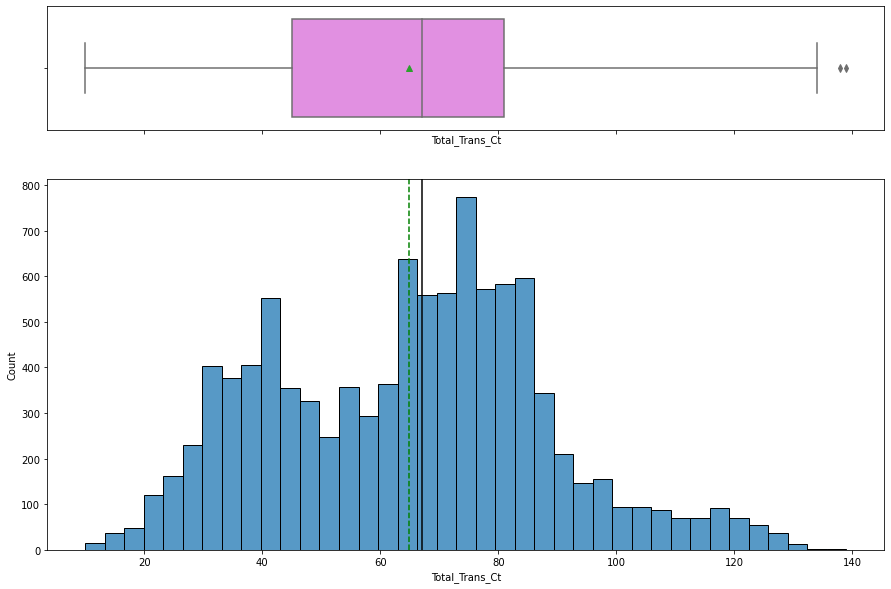

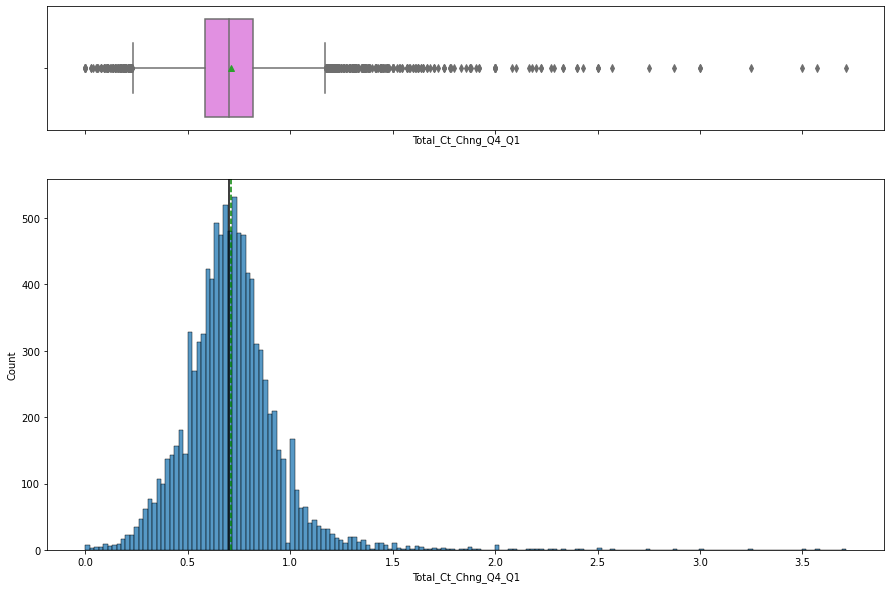

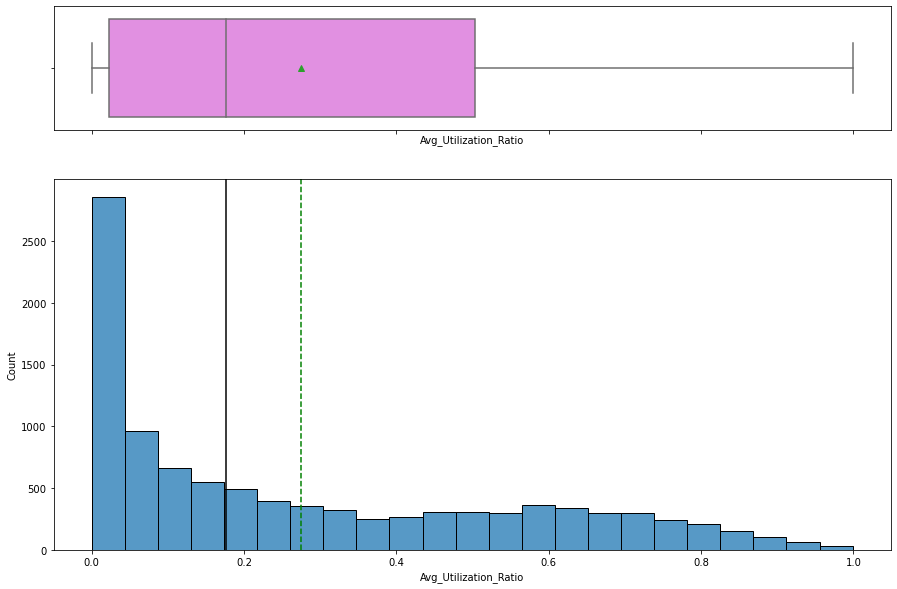

In [26]:
# select all numerical columns to understand further
numeric_col = [
    "Customer_Age",
    "Dependent_count",
    "Months_on_book",
    "Total_Relationship_Count",
    "Months_Inactive_12_mon",
    "Contacts_Count_12_mon",
    "Credit_Limit",
    "Total_Revolving_Bal",
    "Avg_Open_To_Buy",
    "Total_Amt_Chng_Q4_Q1",
    "Total_Trans_Amt",
    "Total_Trans_Ct",
    "Total_Ct_Chng_Q4_Q1",
    "Avg_Utilization_Ratio",
]
for i in range(len(numeric_col)):
    histogram_boxplot(data, numeric_col[i])

### Outliers are present in the below columns

**Customer_Age, Months_on_book, Months_Inactive_12_mon, Contacts_count_12_mon, Credit_Limit, Avg_Open_To_Buy, 
Total_Amt_Chng_Q4_Q1,Total_Trans_Amt, Total_Trans_Ct,Total_Ct_Chng_Q4_Q1**

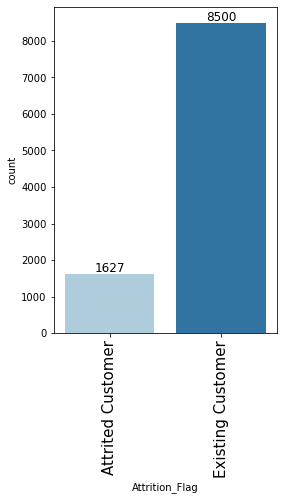

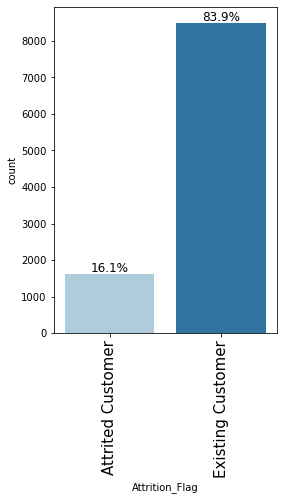

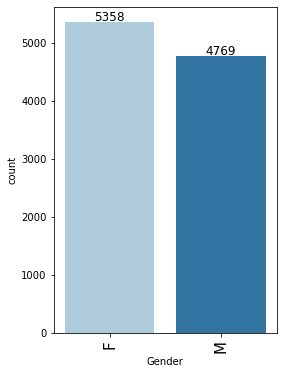

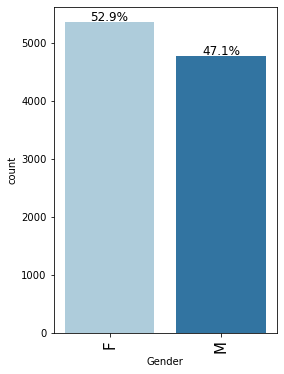

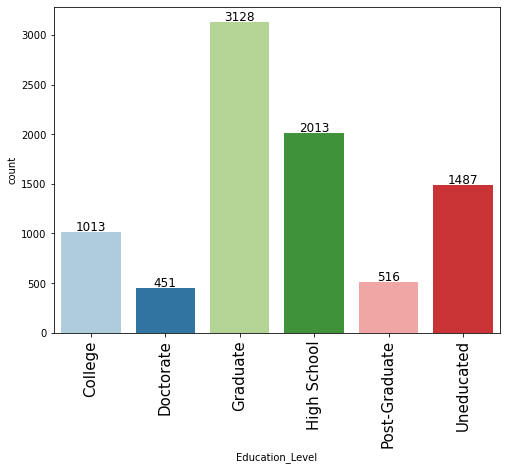

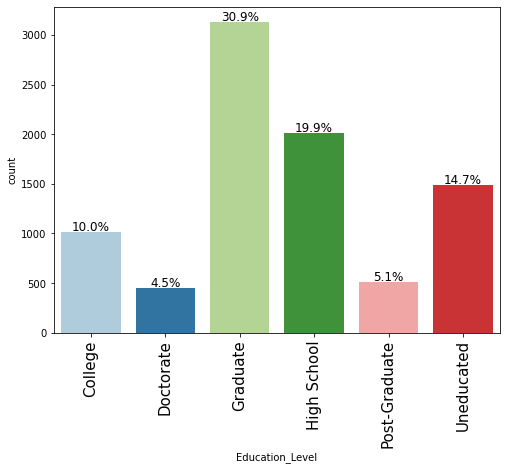

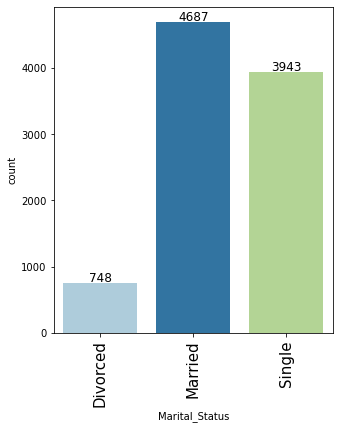

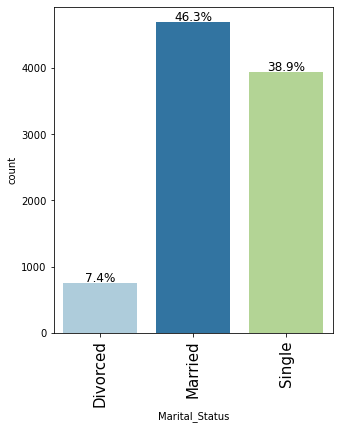

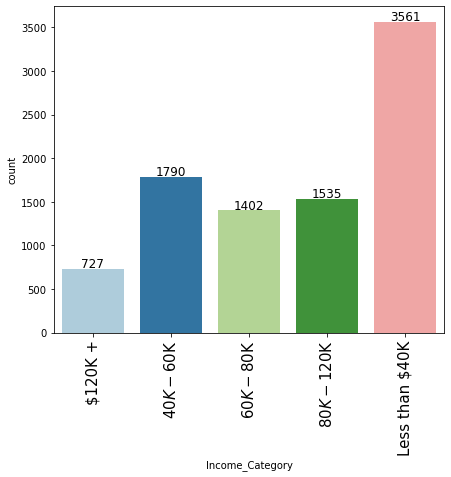

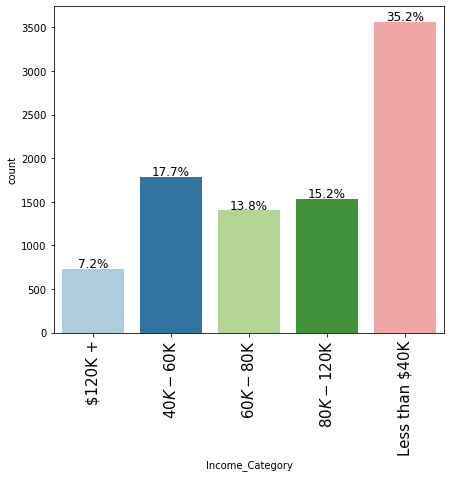

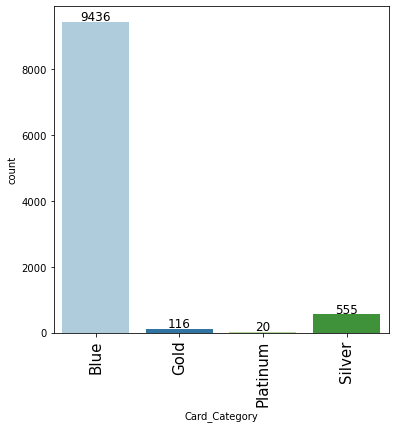

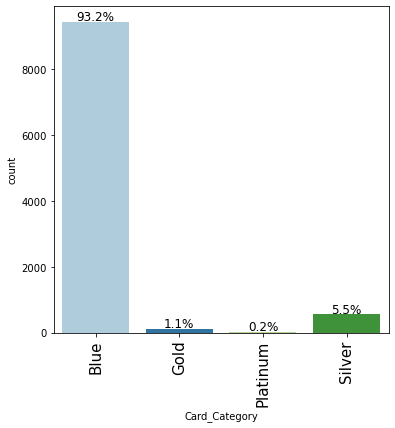

In [28]:
for i in range(len(category_col)):
    labeled_barplot(data, category_col[i])
    labeled_barplot(data, category_col[i], perc=True)

Attrition_Flag     Attrited Customer  Existing Customer    All
Attrition_Flag                                                
Attrited Customer               1627                  0   1627
All                             1627               8500  10127
Existing Customer                  0               8500   8500
------------------------------------------------------------------------------------------------------------------------


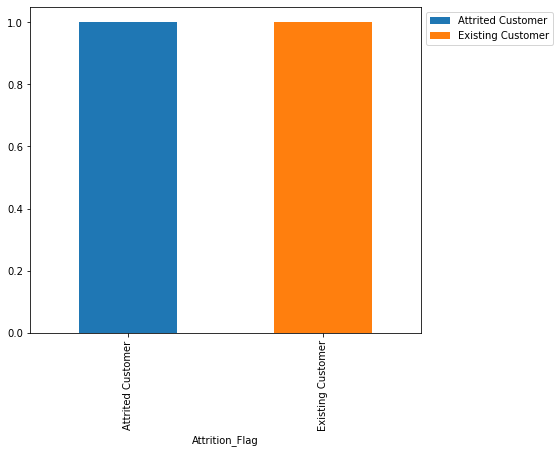

Attrition_Flag  Attrited Customer  Existing Customer    All
Gender                                                     
All                          1627               8500  10127
F                             930               4428   5358
M                             697               4072   4769
------------------------------------------------------------------------------------------------------------------------


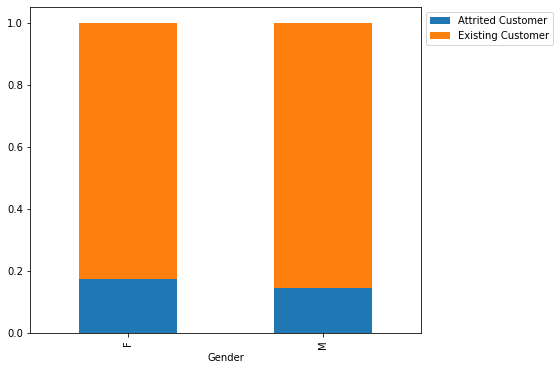

Attrition_Flag   Attrited Customer  Existing Customer   All
Education_Level                                            
All                           1371               7237  8608
Graduate                       487               2641  3128
High School                    306               1707  2013
Uneducated                     237               1250  1487
College                        154                859  1013
Doctorate                       95                356   451
Post-Graduate                   92                424   516
------------------------------------------------------------------------------------------------------------------------


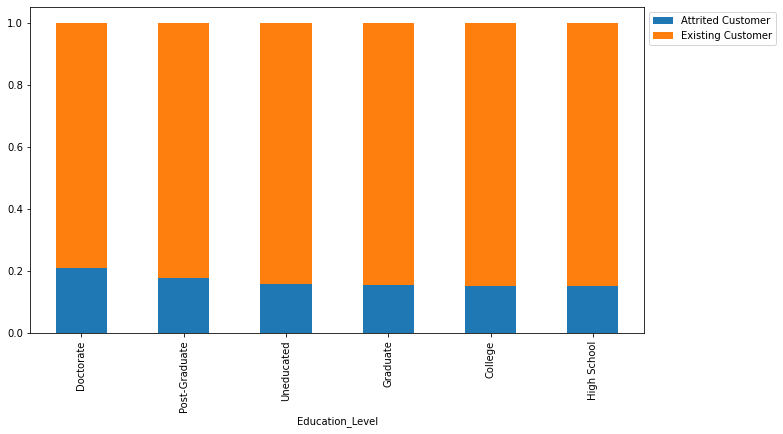

Attrition_Flag  Attrited Customer  Existing Customer   All
Marital_Status                                            
All                          1498               7880  9378
Married                       709               3978  4687
Single                        668               3275  3943
Divorced                      121                627   748
------------------------------------------------------------------------------------------------------------------------


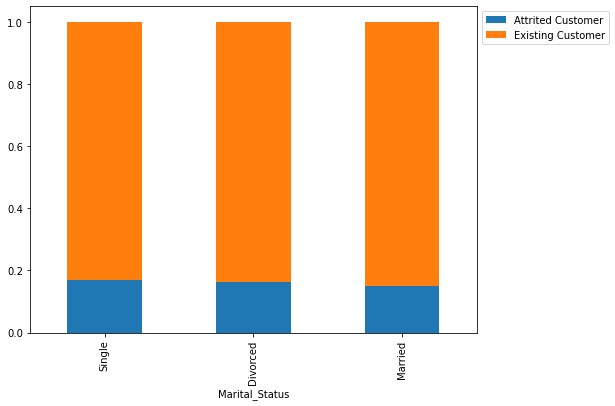

Attrition_Flag   Attrited Customer  Existing Customer   All
Income_Category                                            
All                           1440               7575  9015
Less than $40K                 612               2949  3561
$40K - $60K                    271               1519  1790
$80K - $120K                   242               1293  1535
$60K - $80K                    189               1213  1402
$120K +                        126                601   727
------------------------------------------------------------------------------------------------------------------------


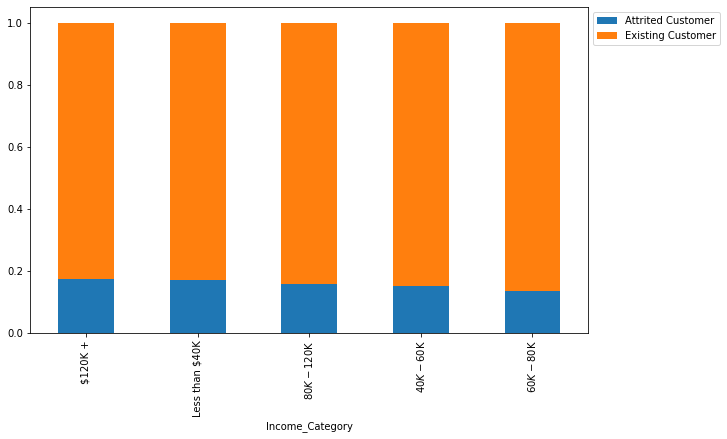

Attrition_Flag  Attrited Customer  Existing Customer    All
Card_Category                                              
All                          1627               8500  10127
Blue                         1519               7917   9436
Silver                         82                473    555
Gold                           21                 95    116
Platinum                        5                 15     20
------------------------------------------------------------------------------------------------------------------------


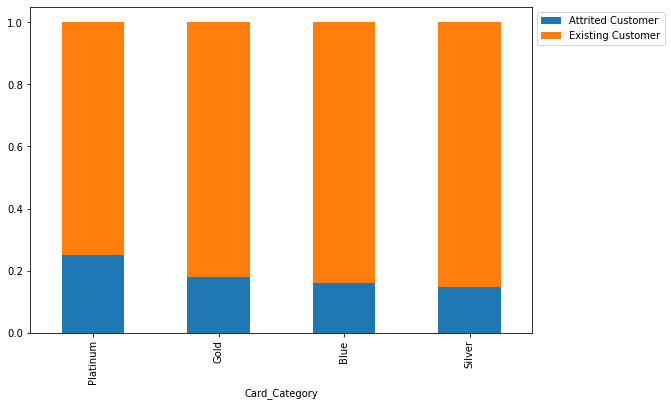

In [29]:
for i in range(len(category_col)):
    stacked_barplot(data, category_col[i], "Attrition_Flag")

## Bivariate Analysis

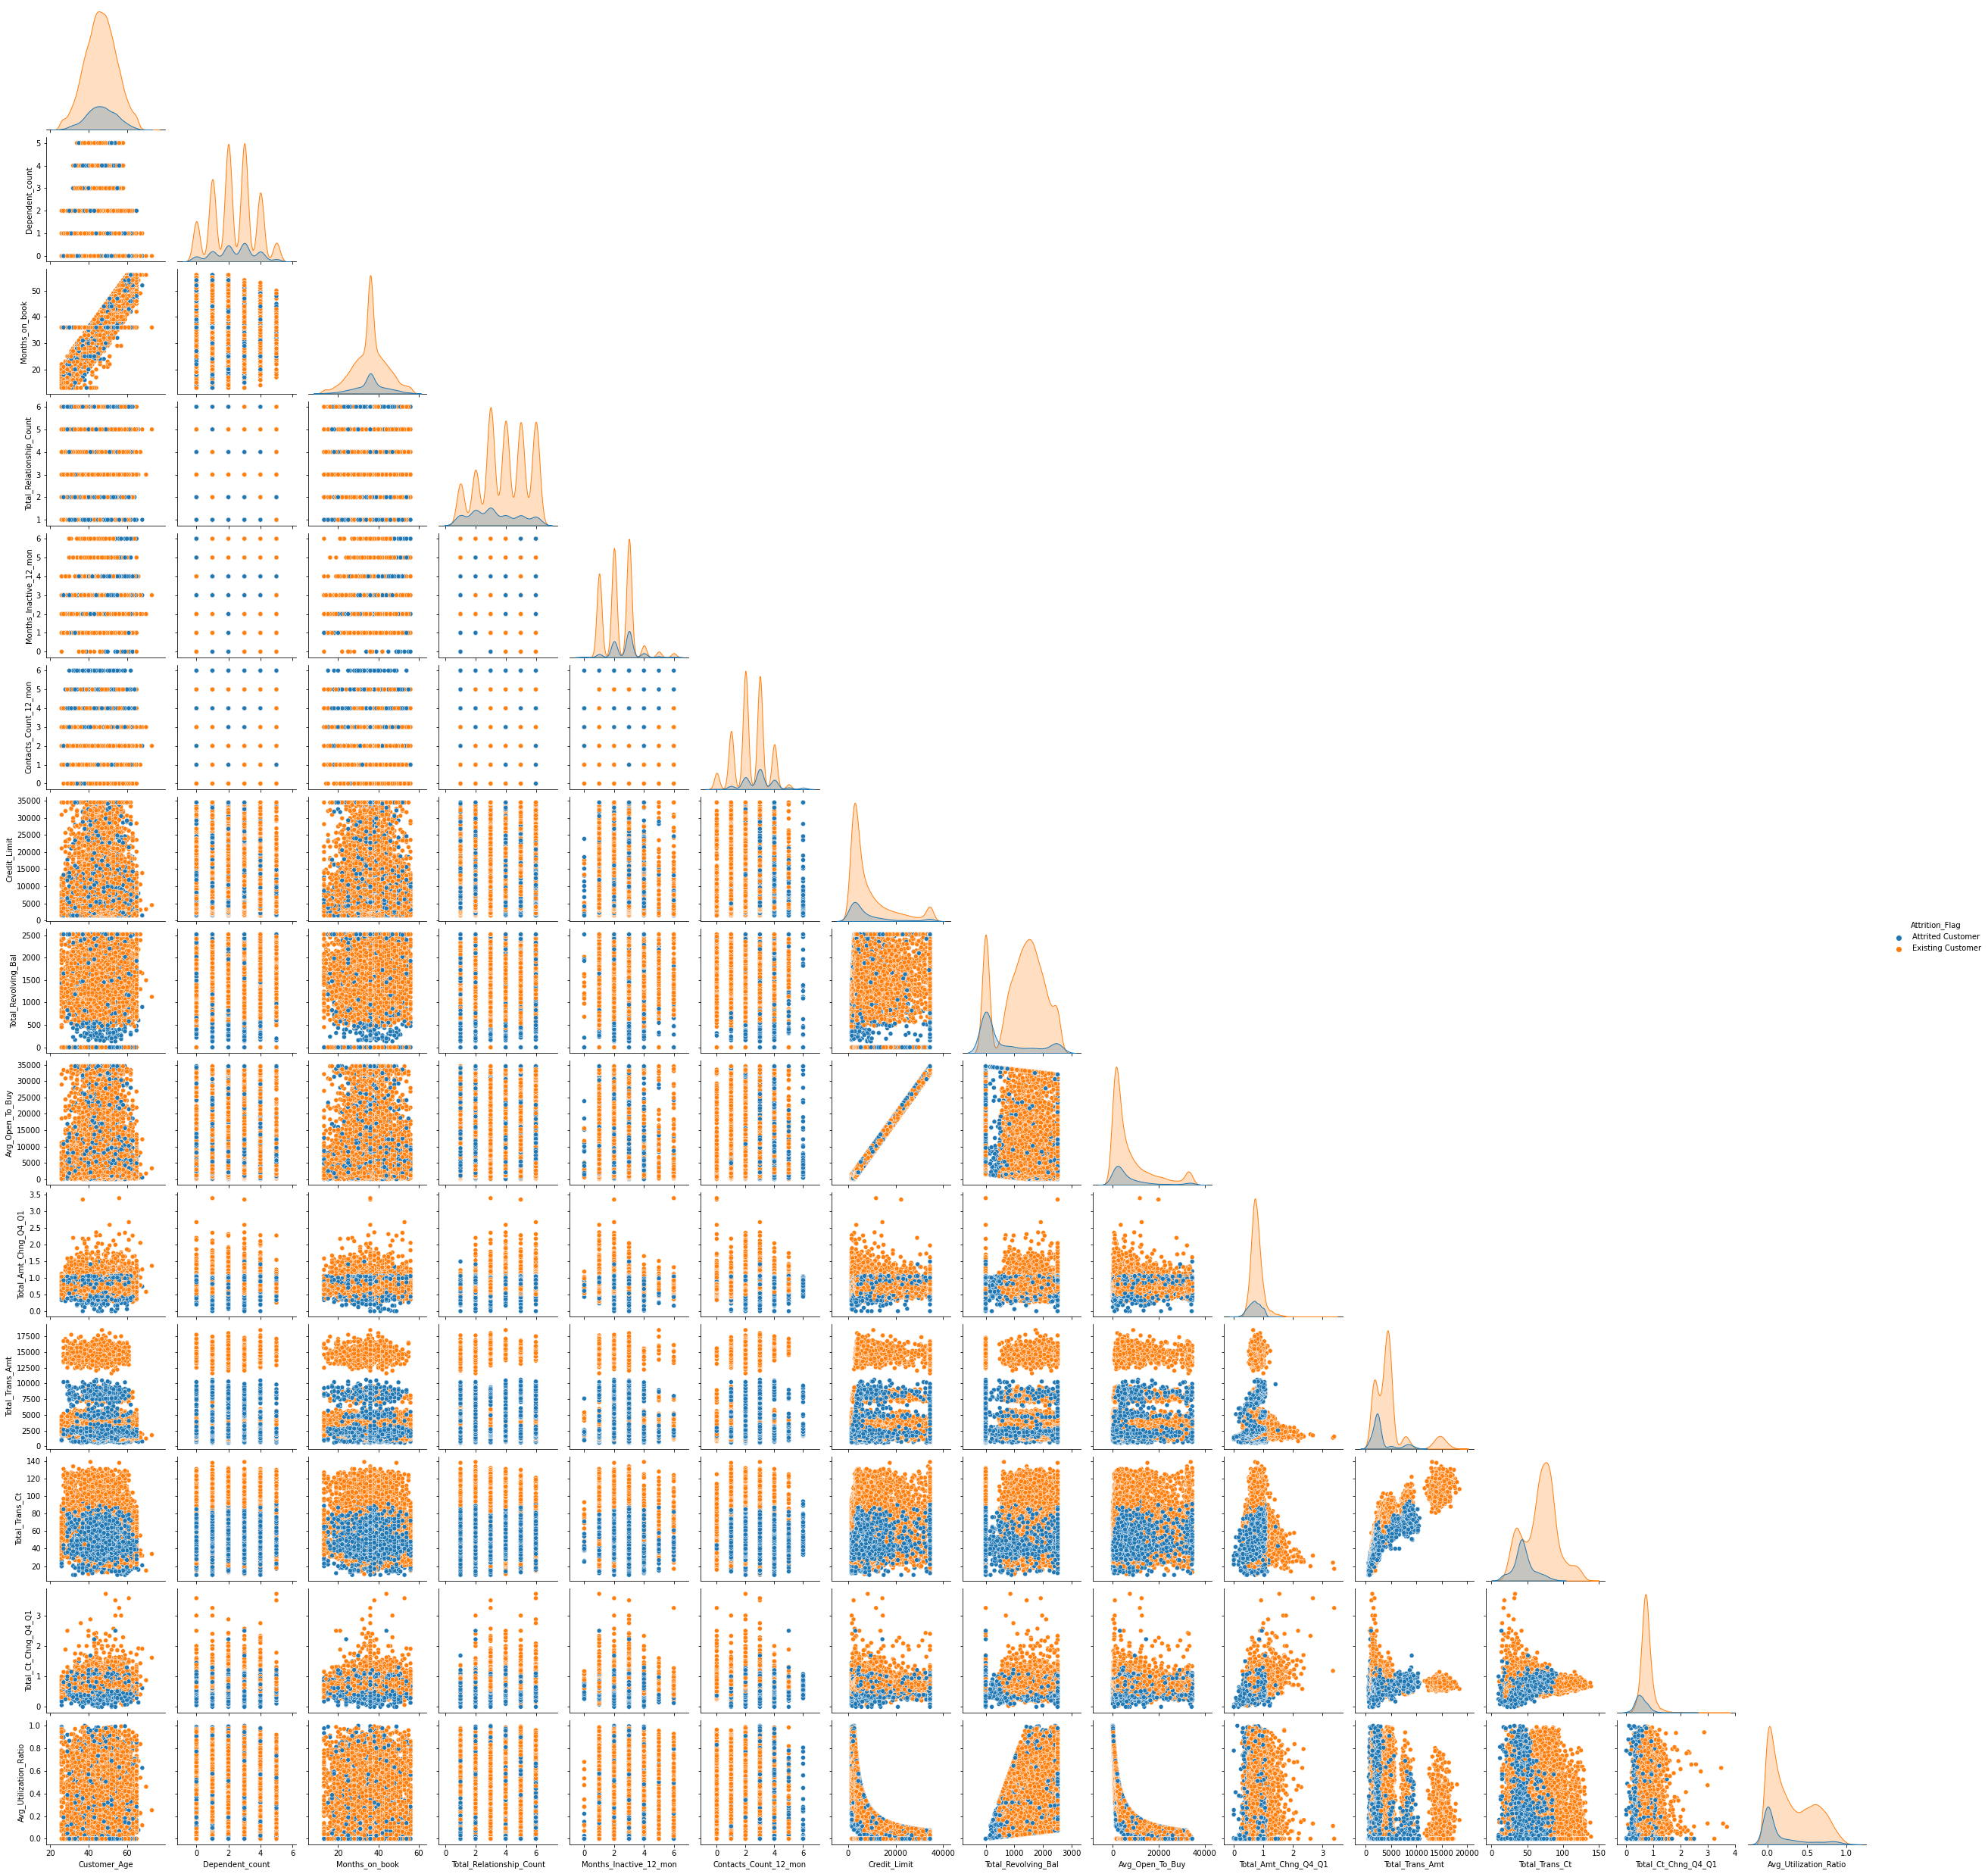

In [30]:
sns.pairplot(data, hue="Attrition_Flag", corner=True)

### Observations

- Customer age and number of books are highly correlated.
- credit limit and Avg utlization ration has some negative correlation.
- Total revolving balance and average utlization are positively correlated.
- Average opening balance is negatively correlated to avg utlization ratio.
- There is very little correlation between total transfer amount and credit limit
- As expected there is very high correlation total transfer amount and total transfer count.
- Credit limit and Average open to buy is fully correlated, we can drop one of them.
- It is also logical that Total_Trans_Amt is correlated to Total_Amt_Chng_Q4_Q1,total ct_change_q4_Q1 . These features seems to be derived from Total_Trans_Amt. May be we can drop one of these columns.

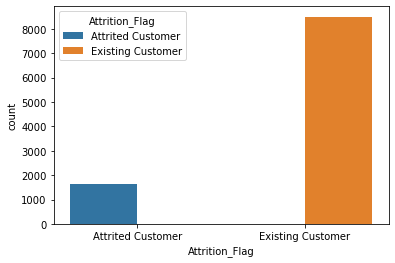

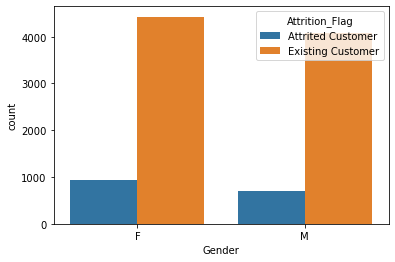

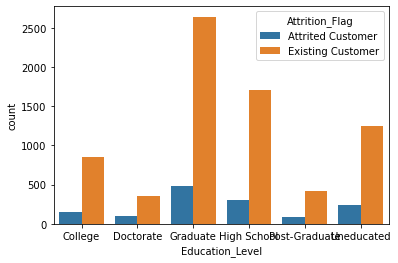

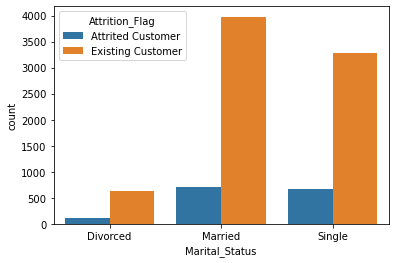

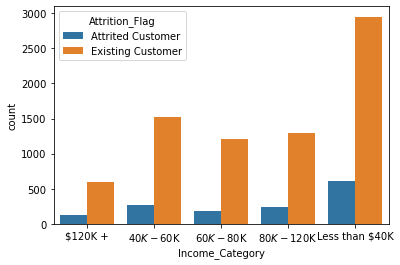

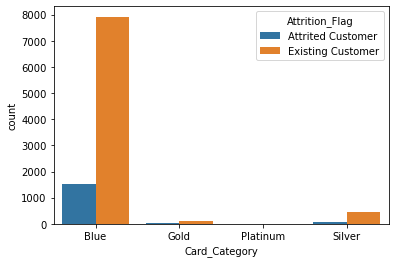

In [31]:
for i in range(len(category_col)):
    sns.countplot(data=data, x=category_col[i], hue="Attrition_Flag")
    plt.show()

([<matplotlib.patches.Wedge at 0x246140adb20>,
 [Text(-0.9628371444551311, 0.5319254019667504, ''),
  Text(0.9628371693563555, -0.5319253568930898, '')],
 [Text(-0.525183896975526, 0.29014112834550015, '83.9%'),
  Text(0.5251839105580121, -0.2901411037598671, '16.1%')])

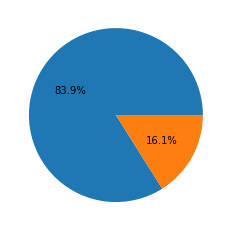

In [32]:
plt.pie(data=data, x=data["Attrition_Flag"].value_counts(), autopct="%1.1f%%")

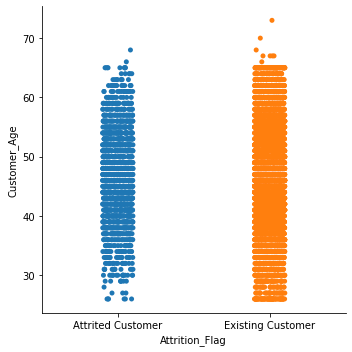

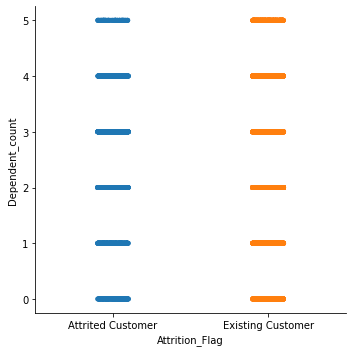

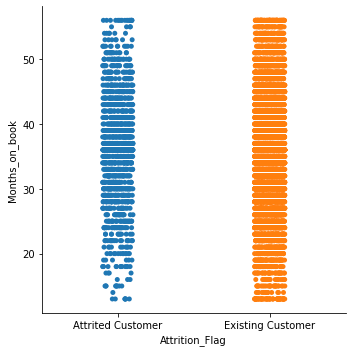

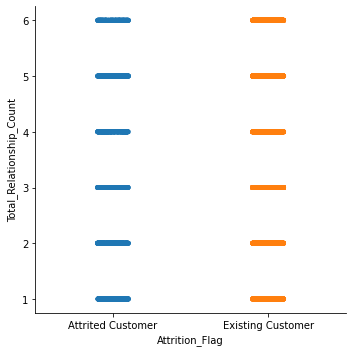

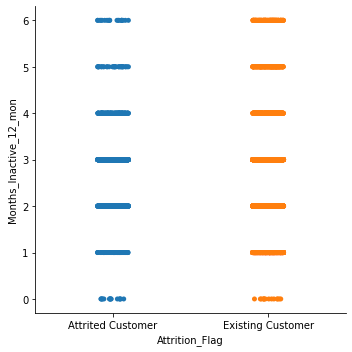

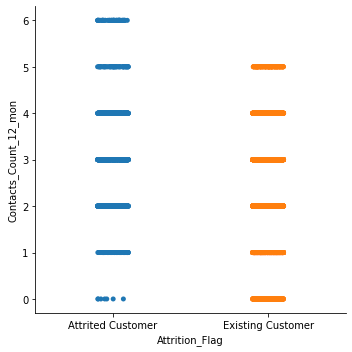

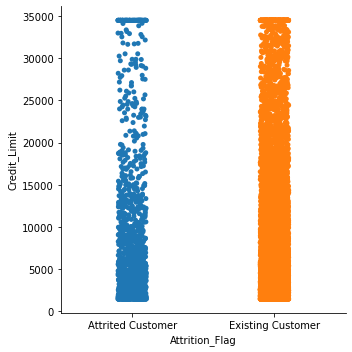

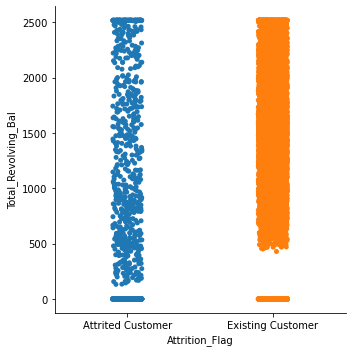

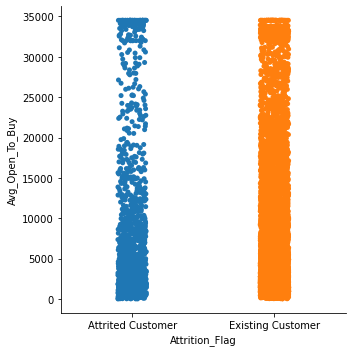

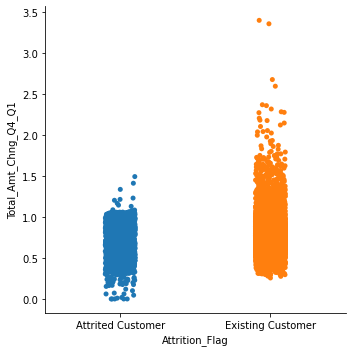

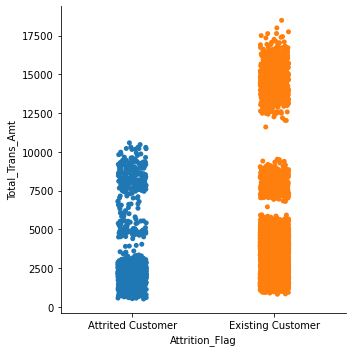

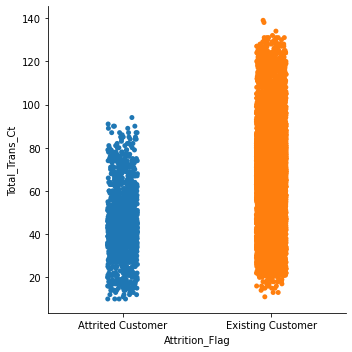

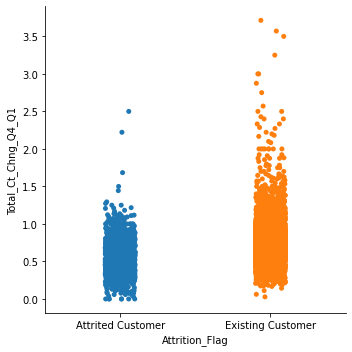

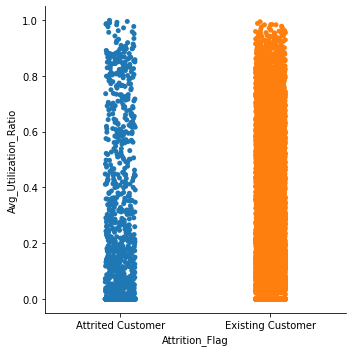

In [34]:
for i in range(len(numeric_col)):
    sns.catplot(x="Attrition_Flag", y=numeric_col[i], data=data)
    plt.show()

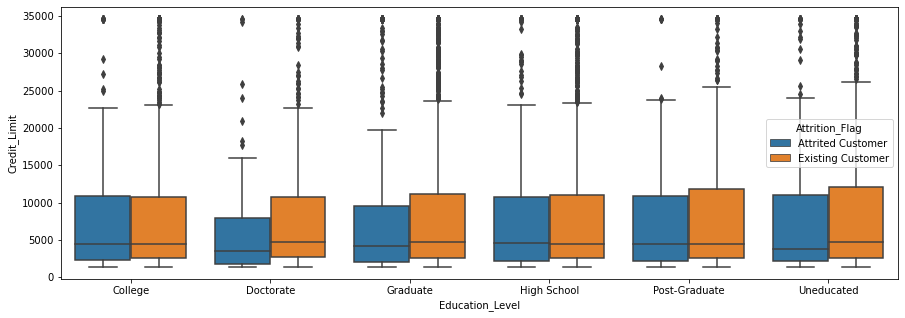

In [35]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Credit_Limit',x='Education_Level',hue='Attrition_Flag',data=data)
plt.show()

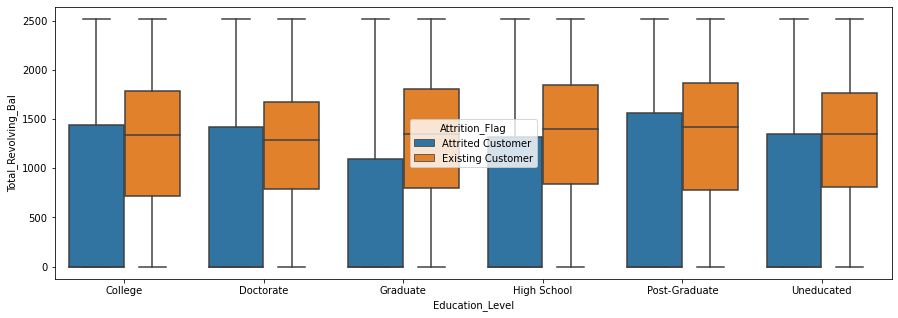

In [36]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Total_Revolving_Bal',x='Education_Level',hue='Attrition_Flag',data=data)
plt.show()

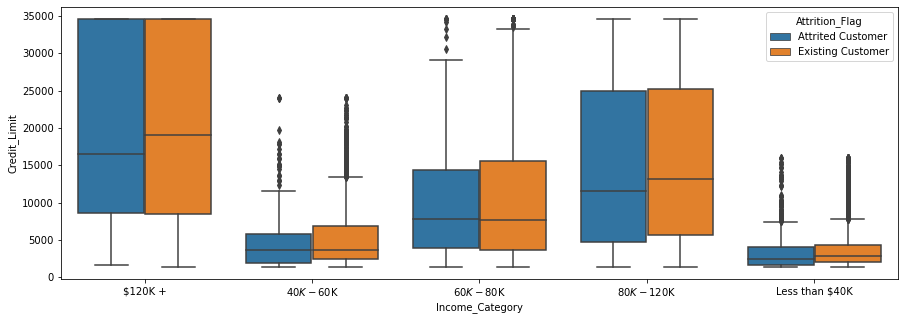

In [37]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Credit_Limit',x='Income_Category',hue='Attrition_Flag',data=data)
plt.show()

<AxesSubplot:xlabel='Customer_Age', ylabel='Attrition_Flag'>

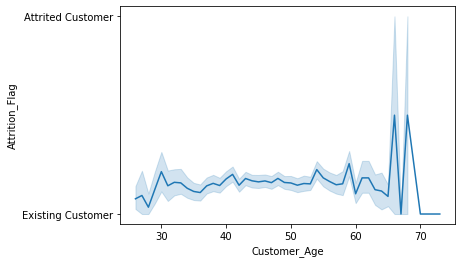

In [38]:
sns.lineplot(x='Customer_Age',y='Attrition_Flag',data=data)

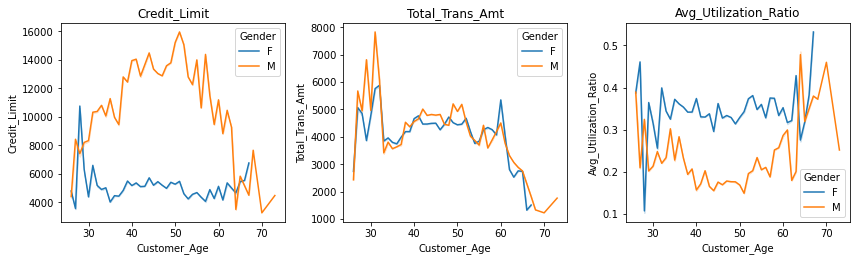

In [39]:
cols = data[['Credit_Limit','Total_Trans_Amt','Avg_Utilization_Ratio']].columns.tolist()
plt.figure(figsize=(12,10))
for i, variable in enumerate(cols):
                     plt.subplot(3,3,i+1)
                     sns.lineplot(data['Customer_Age'],data[variable],hue=data['Gender'],ci=0)
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

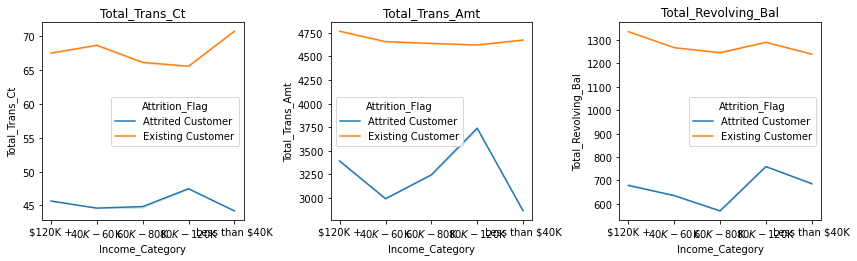

In [40]:
cols = data[['Total_Trans_Ct','Total_Trans_Amt','Total_Revolving_Bal']].columns.tolist()
plt.figure(figsize=(12,10))
for i, variable in enumerate(cols):
                     plt.subplot(3,3,i+1)
                     sns.lineplot(data['Income_Category'],data[variable],hue=data['Attrition_Flag'],ci=0)
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

### Summary of EDA

#### Data Description:

* No Duplicate values are present
* Many missing values and need to impute without data leakage
* There are lots of outliers which will be analysed
* Most datatypes are int64 or category
* Dependent variable is Attrition_Flag which is a category


#### Observations from EDA

Attrition_Flag:

Most customers have existing accounts (84.3%)

* Customer Age is almost Normally disturbuted, with some outlier on higher end.
* Month on book has maximum distrubution around ~35-36.Most customer have credit card for this long. It has many outliers on lower and higher end.
* Credit card limit is right skewed , with a sudden pick at 35000, as seen before this is maxiumum limit and seems to be some kind of default value.There are lot of outliers on higher end. Customers above 25000 need to beinvestigated further.
* Total Revolving bal seems to have different disturbution with many customers with ~0 revolving balance and then it follows almost normal distrubution and then sudden peak at 2500.
* Average open to buy has same distribution as Credit card limit.
* Total Amt change has lot of outliers on lower and upper end. There are some 3.5 ratio of total amount change from Q4 to Q1,this customers which needs to be investigated further.
* Total trans amt also has very different distrubution with data between 0 -2500 , then 2500-5000, and then 750-10000 and then 12500-17500. It has lot of outliers on higher end.
* Total_trans_ct also has 3 modal with outliers on higher end.
* Total ct change q4_q1 has normal like disturbtion with lot of outliers on higher and lower end.
* Avg_utlization ratio is measure of how much of the given credit limit is the customer actually using. 

### Attrition_Flag vs Other Variables

* The most and highest percent of attrited customers tend to be female
* Most attrited customers have a graduate level of education but the highest percentage of attrited customers ina group are those that have a Doctorate
* Most attrited customers are married but the highest percentage of attrited customers in a group are those that are single
* Highest amount of existing and attrited customers make less than 40k but the highest percentage of attrited customers in a group are customers that make 120K+
* Highest amount of existing and attrited have a Blue card but the highest percentage of attrited customers in a group have a platinum card
* Among both attrited and existing customers customer age is similar, slightly older customers tend to attrite
* Attrited customers tend to have 3 or less dependents
* Attrited customers tend to have slightly lower active months
* Attrited customers tend to have a similar range of products as existing customers but a lower mean of them
* Attrited customers tend to have more attempts to be contacted in a yar, a lower credit limit, lower average revolving balance, slightly lower average amounts left on the credit card.
* Attrited customers have much lower total transaction count, ratio of transaction count in the final quarter comapred to the first, lower transactional amount in the 4th quarter compared to the first and lower amount of available credit spent

## Correlation

In [41]:
data.corr()

Customer_Age  Dependent_count  Months_on_book  \
Customer_Age                     1.000           -0.122           0.789   
Dependent_count                 -0.122            1.000          -0.103   
Months_on_book                   0.789           -0.103           1.000   
Total_Relationship_Count        -0.011           -0.039          -0.009   
Months_Inactive_12_mon           0.054           -0.011           0.074   
Contacts_Count_12_mon           -0.018           -0.041          -0.011   
Credit_Limit                     0.002            0.068           0.008   
Total_Revolving_Bal              0.015           -0.003           0.009   
Avg_Open_To_Buy                  0.001            0.068           0.007   
Total_Amt_Chng_Q4_Q1            -0.062           -0.035          -0.049   
Total_Trans_Amt                 -0.046            0.025          -0.039   
Total_Trans_Ct                  -0.067            0.050          -0.050   
Total_Ct_Chng_Q4_Q1             -0.012            0.011          -0.014   
Avg_Utilization_Ratio            0.007           -0.037          -0.008   

                          Total_Relationship_Count  Months_Inactive_12_mon  \
Customer_Age                                -0.011                   0.054   
Dependent_count                             -0.039                  -0.011   
Months_on_book                              -0.009                   0.074   
Total_Relationship_Count                     1.000                  -0.004   
Months_Inactive_12_mon                      -0.004                   1.000   
Contacts_Count_12_mon                        0.055                   0.029   
Credit_Limit                                -0.071                  -0.020   
Total_Revolving_Bal                          0.014                  -0.042   
Avg_Open_To_Buy                             -0.073                  -0.017   
Total_Amt_Chng_Q4_Q1                         0.050                  -0.032   
Total_Trans_Amt                             -0.347                  -0.037   
Total_Trans_Ct                              -0.242                  -0.043   
Total_Ct_Chng_Q4_Q1                          0.041                  -0.039   
Avg_Utilization_Ratio                        0.068                  -0.008   

                          Contacts_Count_12_mon  Credit_Limit  \
Customer_Age                             -0.018         0.002   
Dependent_count                          -0.041         0.068   
Months_on_book                           -0.011         0.008   
Total_Relationship_Count                  0.055        -0.071   
Months_Inactive_12_mon                    0.029        -0.020   
Contacts_Count_12_mon                     1.000         0.021   
Credit_Limit                              0.021         1.000   
Total_Revolving_Bal                      -0.054         0.042   
Avg_Open_To_Buy                           0.026         0.996   
Total_Amt_Chng_Q4_Q1                     -0.024         0.013   
Total_Trans_Amt                          -0.113         0.172   
Total_Trans_Ct                           -0.152         0.076   
Total_Ct_Chng_Q4_Q1                      -0.095        -0.002   
Avg_Utilization_Ratio                    -0.055        -0.483   

                          Total_Revolving_Bal  Avg_Open_To_Buy  \
Customer_Age                            0.015            0.001   
Dependent_count                        -0.003            0.068   
Months_on_book                          0.009            0.007   
Total_Relationship_Count                0.014           -0.073   
Months_Inactive_12_mon                 -0.042           -0.017   
Contacts_Count_12_mon                  -0.054            0.026   
Credit_Limit                            0.042            0.996   
Total_Revolving_Bal                     1.000           -0.047   
Avg_Open_To_Buy                        -0.047            1.000   
Total_Amt_Chng_Q4_Q1                    0.058            0.008   
Total_Trans_Amt            

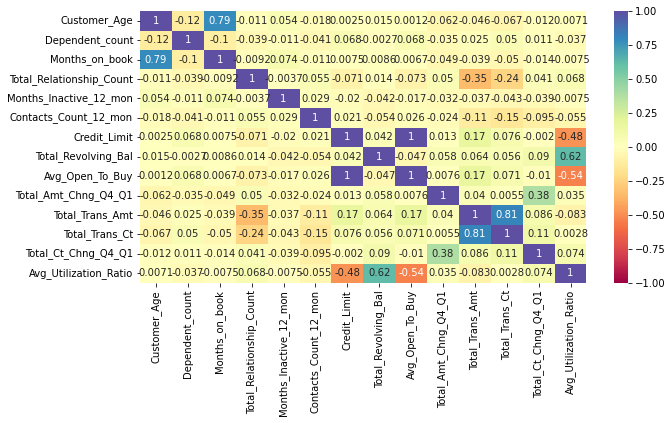

In [42]:
plt.figure(figsize=(10, 5))
sns.heatmap(data.corr(), annot=True, cmap="Spectral", vmin=-1, vmax=1)
plt.show()

**Observations**

* Customer Age and Months_on_book are slightly positively correlated (0.79)
* Credit_Limit and Avg_open_To_Buy are strongly correlated. But for the classification model, multicollinearity treatment is not mandatory. So, both features can be present to build the model. 
* Avg_Utilization_Ratio and Total_Revolving_Bal are positively correlated(0.62)

## Data Preprocessing for modeling 

### Outliers

In [43]:
# Finding the 25th percentile and 75th percentile for the numerical columns.
Q1 = data[numeric_col].quantile(0.25)
Q3 = data[numeric_col].quantile(0.75)

IQR = Q3 - Q1  # Inter Quantile Range (75th percentile - 25th percentile)

lower_whisker = (
    Q1 - 1.5 * IQR
)  # Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper_whisker = Q3 + 1.5 * IQR

In [44]:
# Percentage of outliers in each column
((data[numeric_col] < lower_whisker) | (data[numeric_col] > upper_whisker)).sum() / data.shape[
    0
] * 100

Customer_Age               0.020
Dependent_count            0.000
Months_on_book             3.812
Total_Relationship_Count   0.000
Months_Inactive_12_mon     3.268
Contacts_Count_12_mon      6.211
Credit_Limit               9.717
Total_Revolving_Bal        0.000
Avg_Open_To_Buy            9.509
Total_Amt_Chng_Q4_Q1       3.910
Total_Trans_Amt            8.848
Total_Trans_Ct             0.020
Total_Ct_Chng_Q4_Q1        3.891
Avg_Utilization_Ratio      0.000
dtype: float64

#### Outliers are present in the below columns

Customer_Age, Months_on_book, Months_Inactive_12_mon, Contacts_count_12_mon, Credit_Limit, Avg_Open_To_Buy, 
Total_Amt_Chng_Q4_Q1,Total_Trans_Amt, Total_Trans_Ct,Total_Ct_Chng_Q4_Q1, 

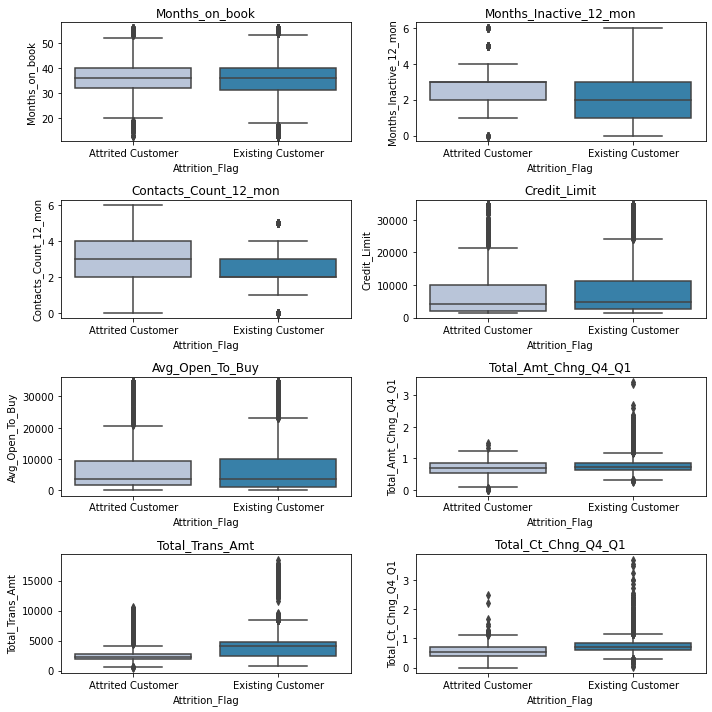

In [45]:
cols = data[
    [
        "Months_on_book",
        "Months_Inactive_12_mon",
        "Contacts_Count_12_mon",
        "Credit_Limit",
        "Avg_Open_To_Buy",
        "Total_Amt_Chng_Q4_Q1",
        "Total_Trans_Amt",
        "Total_Ct_Chng_Q4_Q1",
    ]
].columns.tolist()
plt.figure(figsize=(10, 10))

for i, variable in enumerate(cols):
    plt.subplot(4, 2, i + 1)
    sns.boxplot(data["Attrition_Flag"], data[variable], palette="PuBu")
    plt.tight_layout()
    plt.title(variable)
plt.show()

In [46]:
Q1 = data["Months_on_book"].quantile(0.25)  # 25th quantile
Q3 = data["Months_on_book"].quantile(0.75)  # 75th quantile
IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR
print(lower_whisker)
print(upper_whisker)

17.5
53.5


In [47]:
data.loc[data["Months_on_book"] > 53.5].sort_values("Months_on_book", ascending=False)

Attrition_Flag  Customer_Age Gender  Dependent_count  \
6022   Existing Customer            61      M                1   
4331   Existing Customer            62      M                0   
2821   Existing Customer            65      F                0   
2749   Existing Customer            65      M                1   
2703   Existing Customer            64      F                0   
...                  ...           ...    ...              ...   
3035   Existing Customer            64      F                0   
2966   Existing Customer            60      M                0   
2956   Existing Customer            65      F                1   
2896   Existing Customer            65      M                0   
10107  Attrited Customer            61      M                0   

      Education_Level Marital_Status Income_Category Card_Category  \
6022         Graduate         Single             NaN          Blue   
4331         Graduate         Single    $80K - $120K          Blue   
2821         Graduate        Married     $40K - $60K          Blue   
2749         Graduate        Married  Less than $40K          Blue   
2703      High School        Married  Less than $40K          Blue   
...               ...            ...             ...           ...   
3035         Graduate         Single  Less than $40K          Blue   
2966              NaN        Married     $60K - $80K          Blue   
2956              NaN         Single  Less than $40K          Blue   
2896       Uneducated         Single  Less than $40K          Blue   
10107        Graduate         Single     $60K - $80K          Blue   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
6022               56                         5                       3   
4331               56                         4                       3   
2821               56                         4                       2   
2749               56                         3                       2   
2703               56                         6                       2   
...               ...                       ...                     ...   
3035               54                         3                       1   
2966               54                         4                       1   
2956               54                         4                       2   
2896               54                         3                       1   
10107              54                         2                       1   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
6022                       2      4235.000                 1675   
4331                       3      1438.300                    0   
2821                       1      2692.000                 1869   
2749                       5      3539.000                 2517   
2703                       2      2174.000                 1397   
...                      ...           ...                  ...   
3035                       2      5577.000                  689   
2966                       0      2759.000                 2501   
2956                       2      2209.000                    0   
2896                       5      2644.000                 1691   
10107                      4     11859.000                 1644   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
6022          2560.000                 1.079             3862              76   
4331          1438.300                 0.794             3628              74   
2821           823.000                 0.744             1594              36   
2749          1022.000                 0.346             1463              31   
2703           777.000                 0.620             1755              39   
...                ...                   ...              ...             ...   
3035          4888.000                 0.985             4256              70   
2966           258.000

**After identifying outliers, we can decide whether to remove/treat them or not.  Here we are not going to treat them as there will be outliers in real case scenario and also the data looks continuous. we would want our model to learn the underlying pattern for such customers.**

### Missing value detection

In [48]:
data.isnull().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

**Missing values in "Education_Level", "Marital_Status", "Income_Category" columns should be treated after splitting the train and test data to avoid Data Leakage**

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  category
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  int64   
 4   Education_Level           8608 non-null   category
 5   Marital_Status            9378 non-null   category
 6   Income_Category           9015 non-null   category
 7   Card_Category             10127 non-null  category
 8   Months_on_book            10127 non-null  int64   
 9   Total_Relationship_Count  10127 non-null  int64   
 10  Months_Inactive_12_mon    10127 non-null  int64   
 11  Contacts_Count_12_mon     10127 non-null  int64   
 12  Credit_Limit              10127 non-null  float64 
 13  Total_Revolving_Bal       10127 non-null  int6

## Model Building <a class="anchor" id="model-build"></a>

### Preparing for Maching Learning Model

In [51]:
## Existing and Attrited customers to 0 and 1 respectively
data["Attrition_Flag"].replace("Existing Customer", 0, inplace=True)
data["Attrition_Flag"].replace("Attrited Customer", 1, inplace=True)

In [52]:
imputer = SimpleImputer(strategy="most_frequent")

In [53]:
X = data.drop(["Attrition_Flag"], axis=1)
y = data["Attrition_Flag"]

In [54]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 19) (2026, 19) (2026, 19)


In [55]:
cols_to_impute = ["Education_Level", "Marital_Status", "Income_Category"]

In [56]:
# Fit and transform the train data
X_train[cols_to_impute] = imputer.fit_transform(X_train[cols_to_impute])

# Transform the validation data
X_val[cols_to_impute] = imputer.transform(X_val[cols_to_impute])

# Transform the test data
X_test[cols_to_impute] = imputer.transform(X_test[cols_to_impute])

In [57]:
# Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
------------------------------
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal       

**All missing values have been treated.**

### Encoding categorical variables

In [61]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 29) (2026, 29) (2026, 29)


* Number of rows in train data = 6075
* Number of rows in validation data = 2026
* Number of rows in test data = 2026

* After encoding there are 29 columns.

In [62]:
X_train.head()

Customer_Age  Dependent_count  Months_on_book  Total_Relationship_Count  \
800             40                2              21                         6   
498             44                1              34                         6   
4356            48                4              36                         5   
407             41                2              36                         6   
8728            46                4              36                         2   

      Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
800                        4                      3     20056.000   
498                        2                      0      2885.000   
4356                       1                      2      6798.000   
407                        2                      0     27000.000   
8728                       2                      3     15034.000   

      Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
800                  1602        18454.000                 0.466   
498                  1895          990.000                 0.387   
4356                 2517         4281.000                 0.873   
407                     0        27000.000                 0.610   
8728                 1356        13678.000                 0.754   

      Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
800              1687              46                0.533   
498              1366              31                0.632   
4356             4327              79                0.881   
407              1209              39                0.300   
8728             7737              84                0.750   

      Avg_Utilization_Ratio  Gender_M  Education_Level_Doctorate  \
800                   0.080         1                          0   
498                   0.657         1                          0   
4356                  0.370         1                          0   
407                   0.000         1                          0   
8728                  0.090         1                          0   

      Education_Level_Graduate  Education_Level_High School  \
800                          1                            0   
498                          1                            0   
4356                         0                            1   
407                          1                            0   
8728                         0                            1   

      Education_Level_Post-Graduate  Education_Level_Uneducated  \
800                               0                           0   
498                               0                           0   
4356                              0                           0   
407                               0                           0   
8728                              0                           0   

      Marital_Status_Married  Marital_Status_Single  \
800                        0                      1   
498                        1                      0   
4356                       1                      0   
407                        1                      0   
8728                       0                      0   

      Income_Category_$40K - $60K  Income_Category_$60K - $80K  \
800                             0                            0   
498                             0                            0   
4356                            0                            0   
407                             0                            1   
8728                            1                            0   

      Income_Category_$80K - $120K  Income_Category_Less than $40K  \
800                              0                               0   
498                              0                               1   
4356                             1                               0   
407                              0                               0   
8728                             0                   

In [63]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in validation set:")
print(y_val.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
0   0.839
1   0.161
Name: Attrition_Flag, dtype: float64
Percentage of classes in validation set:
0   0.839
1   0.161
Name: Attrition_Flag, dtype: float64
Percentage of classes in test set:
0   0.840
1   0.160
Name: Attrition_Flag, dtype: float64


**Since the train & test set has 0 and 1(target variable) around 8:2 ratio like the original data, Stratify=Y is not needed**

### Model evaluation criterion

### Model can make wrong predictions as:

1. Predicting a customer will attrite and the customer doesn't attrite - Loss of Resource
2. Predicting a customer will not attrite and the customer attrites - Loss of Opportunity

### Which case is more important? 

* Predicting that customer will not attrite but he attrites  i.e. losing on a potential customr for the bank because that customer will not be considered when he should be considered.

### How to reduce this loss i.e need to reduce False Negatives?

* Bank would want Recall to be maximized, greater the Recall higher the chances of minimizing false negatives. Hence, the focus should be on increasing Recall or minimizing the false negatives means Class 1. This will help the bank to retain their valuable customers by identifying the customers who are at risk of attrition.

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.

In [64]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [65]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Model with original data

**Let's start by building different models using KFold and cross_val_score and tune the best model using RandomizedSearchCV**

- `Stratified K-Folds cross-validation` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive folds (without shuffling by default) keeping the distribution of both classes in each fold the same as the target variable. Each fold is then used once as validation while the k - 1 remaining folds form the training set.

In [72]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Cross-Validation Performance:

Logistic regression: 38.9272632129775
Bagging: 78.58451072736787
Random forest: 75.30507587650445
GBM: 81.24646781789639
Adaboost: 82.16745159602303
Xgboost: 86.78126635269493
dtree: 78.0727367870225

Training Performance:

Logistic regression: 0.49385245901639346
Bagging: 0.985655737704918
Random forest: 1.0
GBM: 0.875
Adaboost: 0.826844262295082
Xgboost: 1.0
dtree: 1.0

Validation Performance:

Logistic regression: 0.5276073619631901
Bagging: 0.8128834355828221
Random forest: 0.7975460122699386
GBM: 0.8558282208588958
Adaboost: 0.852760736196319
Xgboost: 0.8834355828220859
dtree: 0.8159509202453987


* In Original data, Xgboost has the best performance on the validation followed by GBM and Adaboost

In [69]:
for model in models: 
    print(model)

('Logistic regression', LogisticRegression(random_state=1))
('Bagging', BaggingClassifier(random_state=1))
('Random forest', RandomForestClassifier(random_state=1))
('GBM', GradientBoostingClassifier(random_state=1))
('Adaboost', AdaBoostClassifier(random_state=1))
('Xgboost', XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=1, ...))
('

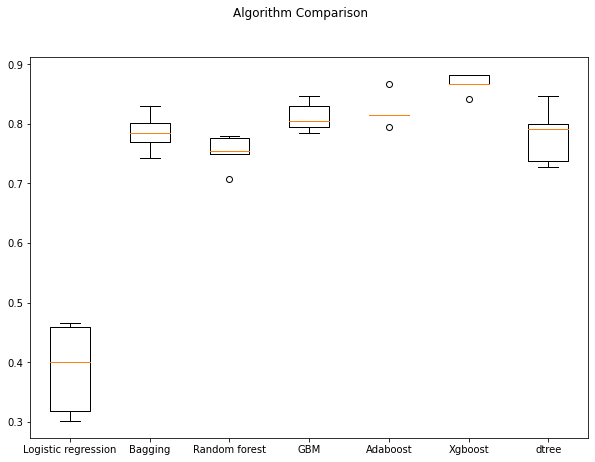

In [73]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

## Models with Oversampled data

In [74]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 976
Before Oversampling, counts of label 'No': 5099 

After Oversampling, counts of label 'Yes': 5099
After Oversampling, counts of label 'No': 5099 

After Oversampling, the shape of train_X: (10198, 29)
After Oversampling, the shape of train_y: (10198,) 



In [75]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))
    
    
print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_train_over, model.predict(X_train_over))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

Logistic regression: 38.9272632129775
Bagging: 78.58451072736787
Random forest: 75.30507587650445
GBM: 81.24646781789639
Adaboost: 82.16745159602303
Xgboost: 86.78126635269493
dtree: 78.0727367870225

Training Performance:

Logistic regression: 0.840949205726613
Bagging: 0.9974504804863699
Random forest: 1.0
GBM: 0.980976662090606
Adaboost: 0.9690135320651108
Xgboost: 1.0
dtree: 1.0

Validation Performance:

Logistic regression: 0.8282208588957055
Bagging: 0.8496932515337423
Random forest: 0.8680981595092024
GBM: 0.8926380368098159
Adaboost: 0.901840490797546
Xgboost: 0.8987730061349694
dtree: 0.8251533742331288


* In Oversampled data, Adaboost has the best performance on validation followed by GBM

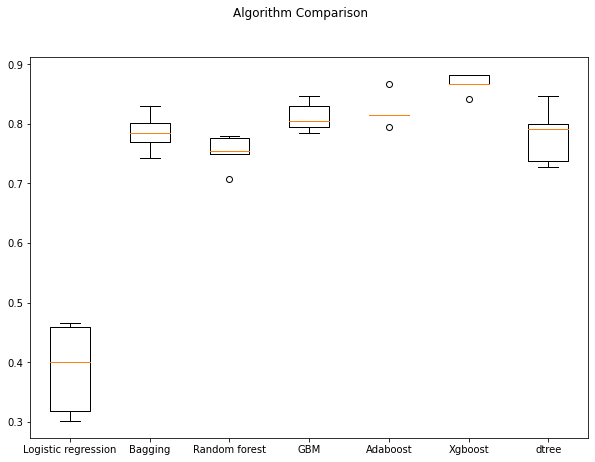

In [76]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

## Models with Undersampled data

In [77]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [78]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 976
Before Under Sampling, counts of label 'No': 5099 

After Under Sampling, counts of label 'Yes': 976
After Under Sampling, counts of label 'No': 976 

After Under Sampling, the shape of train_X: (1952, 29)
After Under Sampling, the shape of train_y: (1952,) 



In [79]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))
    

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(X_train_un))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

Logistic regression: 38.9272632129775
Bagging: 78.58451072736787
Random forest: 75.30507587650445
GBM: 81.24646781789639
Adaboost: 82.16745159602303
Xgboost: 86.78126635269493
dtree: 78.0727367870225

Training Performance:

Logistic regression: 0.8206967213114754
Bagging: 0.9907786885245902
Random forest: 1.0
GBM: 0.9805327868852459
Adaboost: 0.9528688524590164
Xgboost: 1.0
dtree: 1.0

Validation Performance:

Logistic regression: 0.8251533742331288
Bagging: 0.9294478527607362
Random forest: 0.9386503067484663
GBM: 0.9570552147239264
Adaboost: 0.9601226993865031
Xgboost: 0.9570552147239264
dtree: 0.9202453987730062


* In undersampled data, Adaboost has the best performance followed by Xgboost as per the validation performance

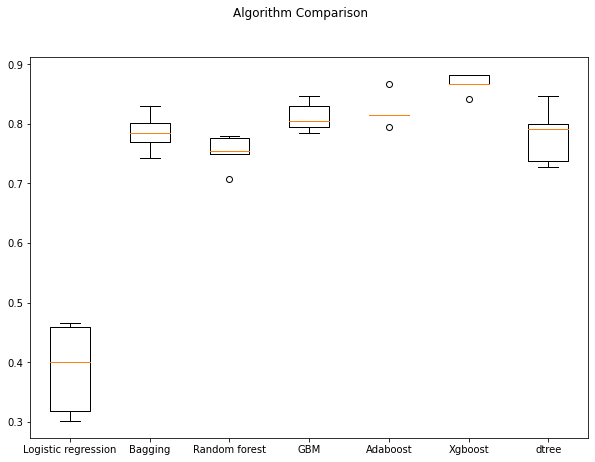

In [80]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

### Performance comparison

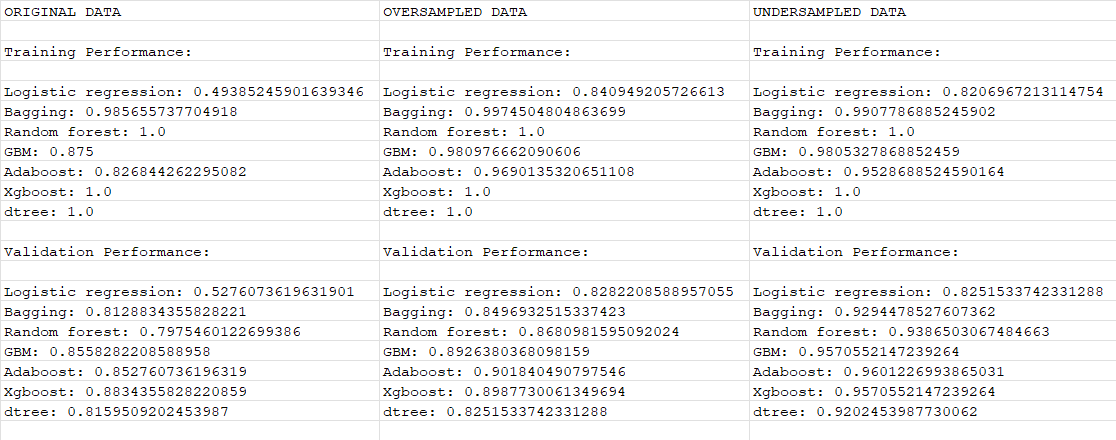

### Models to be tuned for a better performance

* AdaBoost, Gradient boosting, and XGBoost models have consistent and good performance for all 3 datasets.
* So, we will tune these 3 models using undersampled data as it is giving better results
* Sometimes models might overfit after undersampling and oversampling, so it's better to tune models with both undersampled data and original data

##  Hyperparameter Tuning 

* We can tune Adaboost, Gradient boosting, and xgboost models using GridSearchCV and RandomizedSearchCV. But we are going to use Randomized search and then We will also compare the performance and time taken for all the models. 

##   Adaboost 

Tune Adaboost model using **RandomizedSearchCV**

We define certain hyperparameters in the grid and GridSearchCV build model using every possible combination of the hyperparameters defined in the grid and it returns the best combination of the hyperparameters. Grid Search is usually computationally expensive. 

Random Search is another technique to find the best set of hyperparameters which takes lesser time than grid search. Also in this method, the search is not sequentially. Out of the entire search space of hyperparameter, only n_iter number of set of hyperparameters will be checked randomly.

### Tuning with Undersampled data

In [81]:
%%time

# Model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 90, 'learning_rate': 0.2, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.949811616954474:
CPU times: total: 1.89 s
Wall time: 17 s


In [82]:
# Building model with best parameters
adb1_tuned = AdaBoostClassifier(
    n_estimators=90,
    learning_rate=0.2,
    random_state=1,
    base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
)

# Fit the model on training data
adb1_tuned.fit(X_train_un, y_train_un)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.2, n_estimators=90, random_state=1)

#### Checking model performance with Undersampled data

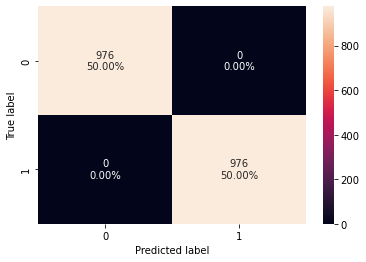

In [83]:
# creating confusion matrix
confusion_matrix_sklearn(adb1_tuned, X_train_un, y_train_un)

In [84]:
# Calculating different metrics on train set
adb1_train = model_performance_classification_sklearn(
    adb1_tuned, X_train_un, y_train_un
)
print("Training performance:")
adb1_train

Training performance:


Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000

In [85]:
# Checking model's performance on validation set
adb1_val = model_performance_classification_sklearn(adb1_tuned, X_val, y_val)
print("Validation performance:")
adb1_val

Validation performance:


Accuracy  Recall  Precision    F1
0     0.935   0.963      0.725 0.827

## Tuning with Original data

In [86]:
%%time

# Model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 90, 'learning_rate': 1, 'base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1)} with CV score=0.8647409733124019:
CPU times: total: 2.78 s
Wall time: 34.2 s


In [87]:
adb2_tuned = AdaBoostClassifier(
    random_state=1,
    n_estimators=90,
    learning_rate=1,
    base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
)
adb2_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         random_state=1),
                   learning_rate=1, n_estimators=90, random_state=1)

#### Checking model performance with Original data

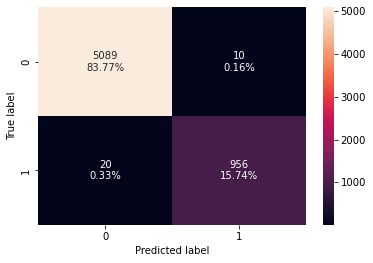

In [88]:
# creating confusion matrix
confusion_matrix_sklearn(adb2_tuned, X_train, y_train)

In [89]:
# Calculating different metrics on train set
adb2_train = model_performance_classification_sklearn(
    adb2_tuned, X_train, y_train
)
print("Training performance with Original data:")
adb2_train

Training performance with Original data:


Accuracy  Recall  Precision    F1
0     0.995   0.980      0.990 0.985

In [90]:
# Checking model's performance on validation set
adb2_val = model_performance_classification_sklearn(adb2_tuned, X_val, y_val)
print("Validation performance with Original data:")
adb2_val

Validation performance with Original data:


Accuracy  Recall  Precision    F1
0     0.967   0.871      0.922 0.896

## Gradient Boosting Classifier

### Tuning with Undersampled Data

In [91]:
%%time 

#Creating pipeline
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.7, 'learning_rate': 0.2, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.9538827838827839:
CPU times: total: 1.62 s
Wall time: 14.7 s


In [92]:
gbm1_tuned = GradientBoostingClassifier(
    random_state=1,
    subsample=0.7,
    n_estimators=125,
    max_features=0.7,
    learning_rate=0.2,
    init=AdaBoostClassifier(random_state=1),
)
gbm1_tuned.fit(X_train_un, y_train_un)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.2, max_features=0.7,
                           n_estimators=125, random_state=1, subsample=0.7)

#### Checking model performance with Undersampled data

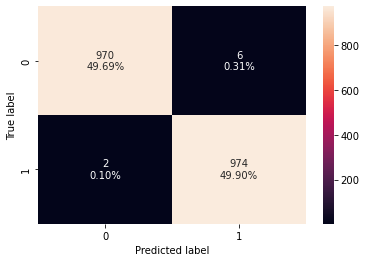

In [93]:
# creating confusion matrix
confusion_matrix_sklearn(gbm1_tuned, X_train_un, y_train_un)

In [94]:
# Calculating different metrics on train set
gbm1_train = model_performance_classification_sklearn(
    gbm1_tuned, X_train_un, y_train_un
)
print("Training performance:")
gbm1_train

Training performance:


Accuracy  Recall  Precision    F1
0     0.996   0.998      0.994 0.996

In [95]:
# Checking model's performance on validation set
gbm1_val = model_performance_classification_sklearn(gbm1_tuned, X_val, y_val)
print("Validation performance:")
gbm1_val

Validation performance:


Accuracy  Recall  Precision    F1
0     0.945   0.957      0.763 0.849

### Tuning with Original Data

In [96]:
%%time 

#defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.7, 'learning_rate': 0.2, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.8596180010465725:
CPU times: total: 3.17 s
Wall time: 36.8 s


In [97]:
gbm2_tuned = GradientBoostingClassifier(
    random_state=1,
    subsample=0.7,
    n_estimators=125,
    max_features=0.7,
    learning_rate=0.2,
    init=AdaBoostClassifier(random_state=1),
)
gbm2_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.2, max_features=0.7,
                           n_estimators=125, random_state=1, subsample=0.7)

#### Checking model performance with Original data

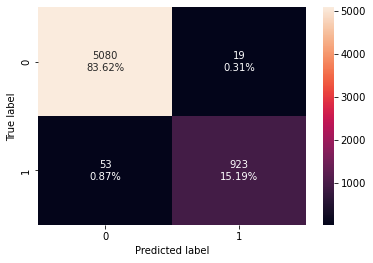

In [98]:
# creating confusion matrix
confusion_matrix_sklearn(gbm2_tuned, X_train, y_train)

In [99]:
# Checking model's performance on training set
gbm2_train = model_performance_classification_sklearn(gbm2_tuned, X_train, y_train)
print("Training performance:")
gbm2_train

Training performance:


Accuracy  Recall  Precision    F1
0     0.988   0.946      0.980 0.962

In [100]:
# Checking model's performance on validation set
gbm2_val = model_performance_classification_sklearn(gbm2_tuned, X_val, y_val)
print("Validation performance:")
gbm2_val

Validation performance:


Accuracy  Recall  Precision    F1
0     0.969   0.880      0.926 0.903

## XGBoost (eXtreme Gradient Boosting)

### Tuning with Undersampled data

In [101]:
%%time 

# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':np.arange(50,300,50),'scale_pos_weight':[0,1,2,5,10],
            'learning_rate':[0.01,0.1,0.2,0.05], 'gamma':[0,1,3,5],
            'subsample':[0.7,0.8,0.9,1]
           }
from sklearn import metrics

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 10, 'n_estimators': 200, 'learning_rate': 0.01, 'gamma': 1} with CV score=0.980559916274202:
CPU times: total: 3.72 s
Wall time: 22.1 s


In [102]:
xgb1_tuned = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample=0.9,
    scale_pos_weight=10,
    n_estimators=200,
    learning_rate=0.01,
    gamma=1,
)
xgb1_tuned.fit(X_train_un, y_train_un)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, gamma=1, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=1, ...)

#### Checking model performance with Undersampled data

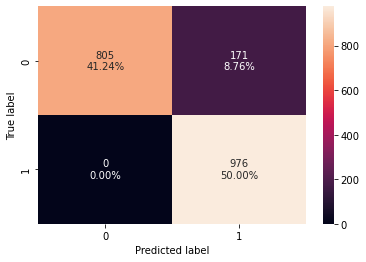

In [103]:
# creating confusion matrix
confusion_matrix_sklearn(xgb1_tuned, X_train_un, y_train_un)

In [104]:
# Checking model's performance on train set
xgb1_train = model_performance_classification_sklearn(
    xgb1_tuned, X_train_un, y_train_un
)
print("Training performance:")
xgb1_train

Training performance:


Accuracy  Recall  Precision    F1
0     0.912   1.000      0.851 0.919

In [105]:
# Checking model's performance on validation set
xgb1_val = model_performance_classification_sklearn(xgb1_tuned, X_val, y_val)
print("Validation performance:")
xgb1_val

Validation performance:


Accuracy  Recall  Precision    F1
0     0.818   0.988      0.469 0.636

### Tuning with Original data

In [106]:
%%time 

# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':np.arange(50,300,50),'scale_pos_weight':[0,1,2,5,10],
            'learning_rate':[0.01,0.1,0.2,0.05], 'gamma':[0,1,3,5],
            'subsample':[0.7,0.8,0.9,1]
           }
from sklearn import metrics

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 10, 'n_estimators': 200, 'learning_rate': 0.01, 'gamma': 1} with CV score=0.9405442176870749:
CPU times: total: 7.38 s
Wall time: 1min


In [107]:
xgb2_tuned = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample=0.9,
    scale_pos_weight=10,
    n_estimators=200,
    learning_rate=0.01,
    gamma=1,
)
xgb2_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, gamma=1, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=1, ...)

#### Checking model performance with Original data

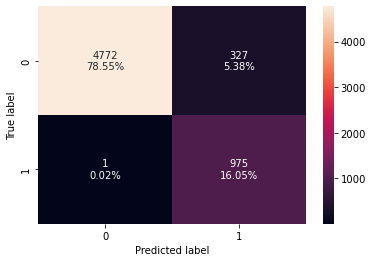

In [108]:
# creating confusion matrix
confusion_matrix_sklearn(xgb2_tuned, X_train, y_train)

In [109]:
# Checking model's performance on train set
xgb2_train = model_performance_classification_sklearn(
    xgb2_tuned, X_train, y_train
)
print("Training performance:")
xgb2_train

Training performance:


Accuracy  Recall  Precision    F1
0     0.946   0.999      0.749 0.856

In [110]:
# Checking model's performance on validation set
xgb2_val = model_performance_classification_sklearn(xgb2_tuned, X_val, y_val)
print("Validation performance:")
xgb2_val

Validation performance:


Accuracy  Recall  Precision    F1
0     0.930   0.960      0.710 0.816

## Model Performance comparison

In [111]:
# Training performance comparison

models_train_comp_df = pd.concat(
    [
        adb1_train.T,
        adb2_train.T,
        gbm1_train.T,
        gbm2_train.T,
        xgb1_train.T,
        xgb2_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "AdaBoost trained with Undersampled data",
    "AdaBoost trained with Original data",
    "Gradient boosting trained with Undersampled data",
    "Gradient boosting trained with Original data",
    "XGBoost trained with Undersampled data",
    "XGBoost trained with Original data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


AdaBoost trained with Undersampled data  \
Accuracy                                     1.000   
Recall                                       1.000   
Precision                                    1.000   
F1                                           1.000   

           AdaBoost trained with Original data  \
Accuracy                                 0.995   
Recall                                   0.980   
Precision                                0.990   
F1                                       0.985   

           Gradient boosting trained with Undersampled data  \
Accuracy                                              0.996   
Recall                                                0.998   
Precision                                             0.994   
F1                                                    0.996   

           Gradient boosting trained with Original data  \
Accuracy                                          0.988   
Recall                                            0.946   
Precision                                         0.980   
F1                                                0.962   

           XGBoost trained with Undersampled data  \
Accuracy                                    0.912   
Recall                                      1.000   
Precision                                   0.851   
F1                                          0.919   

           XGBoost trained with Original data  
Accuracy                                0.946  
Recall                                  0.999  
Precision                               0.749  
F1                                      0.856

In [112]:
# Validation performance comparison

models_val_comp_df = pd.concat(
    [
        adb1_val.T, 
        adb2_val.T,
        gbm1_val.T, 
        gbm2_val.T, 
        xgb1_val.T, 
        xgb2_val.T, 
    ], 
    axis=1,
)
models_val_comp_df.columns = [
    "AdaBoost trained with Undersampled data",
    "AdaBoost trained with Original data",
    "Gradient boosting trained with Undersampled data",
    "Gradient boosting trained with Original data",
    "XGBoost trained with Undersampled data",
    "XGBoost trained with Original data",
    
]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


AdaBoost trained with Undersampled data  \
Accuracy                                     0.935   
Recall                                       0.963   
Precision                                    0.725   
F1                                           0.827   

           AdaBoost trained with Original data  \
Accuracy                                 0.967   
Recall                                   0.871   
Precision                                0.922   
F1                                       0.896   

           Gradient boosting trained with Undersampled data  \
Accuracy                                              0.945   
Recall                                                0.957   
Precision                                             0.763   
F1                                                    0.849   

           Gradient boosting trained with Original data  \
Accuracy                                          0.969   
Recall                                            0.880   
Precision                                         0.926   
F1                                                0.903   

           XGBoost trained with Undersampled data  \
Accuracy                                    0.818   
Recall                                      0.988   
Precision                                   0.469   
F1                                          0.636   

           XGBoost trained with Original data  
Accuracy                                0.930  
Recall                                  0.960  
Precision                               0.710  
F1                                      0.816

### Observations

* Gradient boosting and XGBoost models trained with original data has generalised performance.
* Its difficult to check which model to choose within this two.
* Testing the performance of both with unseen data to choose the best models for production.

In [113]:
# Calculating different metrics on the test set - GBM model
gbm2_test = model_performance_classification_sklearn(gbm2_tuned, X_test, y_test)
gbm2_test

Accuracy  Recall  Precision    F1
0     0.976   0.917      0.934 0.925

In [114]:
# Calculating different metrics on the test set - XGB model
xgb2_test = model_performance_classification_sklearn(xgb2_tuned, X_test, y_test)
xgb2_test

Accuracy  Recall  Precision    F1
0     0.926   0.963      0.694 0.807

### Model observation after testing

* The model has given good performance on test set.
* Gradient Boost model has little less Recall than XGBoost
* But overall accuracy, precision and Recall are better in GBM

### Feature Importance Using Sklearn 

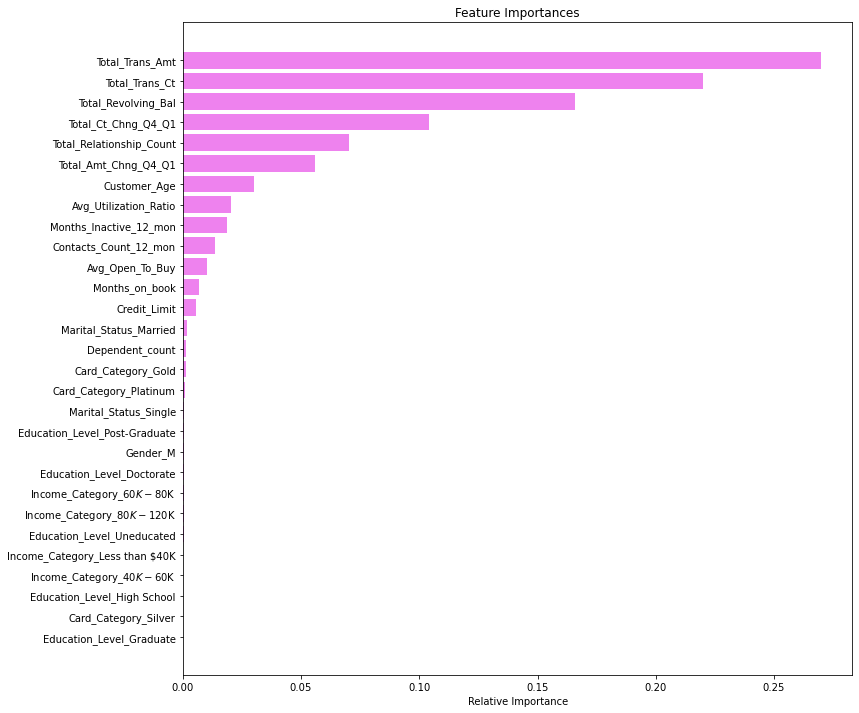

In [115]:
feature_names = X_train.columns
importances = gbm2_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Observations 
**Total_Trans_Amt is the most important variable in predicting credit card churn followed by Total_Trans_Ct, Total_Revolving_Bal, Total_Ct_Chng_Q4_Q1, and Total_Relationship_Count.**

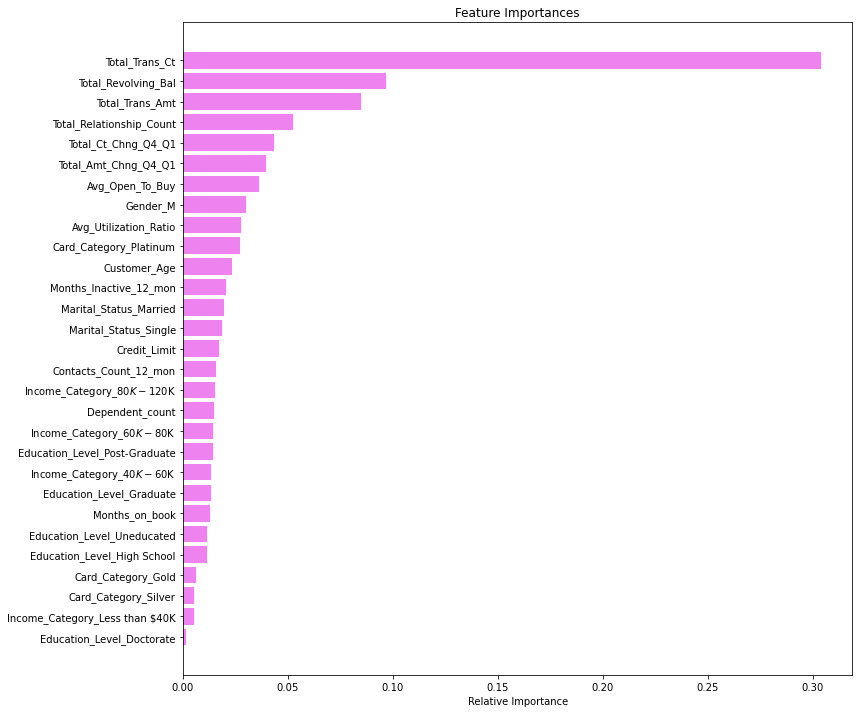

In [116]:
feature_names = X_train.columns
importances = xgb2_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Observations 

**Total_Trans_Ct is the most important variable in predicting credit card churn followed by Total_Revolving_Bal, Total_Trans_Amt, Total_Relationship_Count and Total_Ct_Chng_Q4_Q1.**

# Since we are more interested in Recall, XGBoost with Original data can be considered for Production.

# Column Transformer to build the final model

* We know that we can use pipelines to standardize the model building, but the steps in a pipeline are applied to each and every variable - how can we personalize the pipeline to perform different processing on different columns
* Column transformer allows different columns or column subsets of the input to be transformed separately and the features generated by each transformer will be concatenated to form a single feature space. This is useful for heterogeneous or columnar data, to combine several feature extraction mechanisms or transformations into a single transformer.

We will create 2 different pipelines, one for numerical columns and one for categorical columns. For numerical columns, we will do missing value imputation as pre-processing. For categorical columns, we will do one hot encoding and missing value imputation as pre-processing
We are doing missing value imputation for the whole data, so that if there is any missing value in the data in future that can be taken care of.

In [117]:
# creating a list of numerical variables
numerical_features = [
     'Customer_Age', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon','Contacts_Count_12_mon',
      'Credit_Limit', 'Total_Revolving_Bal','Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

# creating a transformer for numerical variables, which will apply simple imputer on the numerical variables
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median"))])


# creating a list of categorical variables
categorical_features = ['Gender','Dependent_count', 'Education_Level', 'Marital_Status','Income_Category', 'Card_Category']

# creating a transformer for categorical variables, which will first apply simple imputer and 
#then do one hot encoding for categorical variables
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)
# handle_unknown = "ignore", allows model to handle any unknown category in the test data

# combining categorical transformer and numerical transformer using a column transformer

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features),
    ],
    remainder="passthrough",
)
# remainder = "passthrough" has been used, it will allow variables that are present in original data 
# but not in "numerical_columns" and "categorical_columns" to pass through the column transformer without any changes


In [118]:
preprocessor.get_feature_names_out

<bound method ColumnTransformer.get_feature_names_out of ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median'))]),
                                 ['Customer_Age', 'Months_on_book',
                                  'Total_Relationship_Count',
                                  'Months_Inactive_12_mon',
                                  'Contacts_Count_12_mon', 'Credit_Limit',
                                  'Total_Revolving_Bal', 'Avg_Open_To_Buy',
                                  'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
                                  'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
                                  'Avg_Utilization_Ratio']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
        

In [119]:
# Separating target variable and other variables
X = bank_churn.drop(columns="Attrition_Flag")
Y = bank_churn["Attrition_Flag"]

In [120]:
# Dropping unique ID
X.drop(["CLIENTNUM"], axis=1, inplace=True)

In [121]:
X["Income_Category"].replace("abc", np.nan, inplace=True)

In [122]:
## Existing and Attrited customers to 0 and 1 respectively
Y.replace("Existing Customer", 0, inplace=True)
Y.replace("Attrited Customer", 1, inplace=True)

Now we already know the best model we need to process with, so we don't need to divide data into 3 parts- train, validation and test

In [123]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)
print(X_train.shape, X_test.shape)

(7088, 19) (3039, 19)


# Final Pipeline to productionize the model

In [124]:
%%time
# Creating new pipeline with best parameters
model = Pipeline(
    steps=[
        ("pre", preprocessor),
        (
            "XGB", 
            XGBClassifier(
            random_state=1,
            eval_metric="logloss",
            subsample=0.9,
            scale_pos_weight=10,
            n_estimators=200,
            learning_rate=0.01,
            gamma=1,

            ),
        ),
    ]
)
# Fit the model on training data
model.fit(X_train, y_train)

CPU times: total: 7.45 s
Wall time: 1.21 s


Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Customer_Age',
                                                   'Months_on_book',
                                                   'Total_Relationship_Count',
                                                   'Months_Inactive_12_mon',
                                                   'Contacts_Count_12_mon',
                                                   'Credit_Limit',
                                                   'Total_Revolving_Bal',
                                                   'Avg_Open_To_Buy',
                                                   'Total_Amt_Chng_Q4_Q1',
                                                   'Total_Trans_Amt',
             

In [125]:
# transforming and predicting on test data
model.predict(X_test)

array([0, 1, 0, ..., 0, 0, 0])

# Business Recommendations

* The most important features to understand customer credit card churn, are
       - Total Transaction Count
       - Total Transaction Amount
       - Total Revolving Balance
       - Total Amount Change Q4 to Q1
       - Total Count Change Q4 to Q1
       - Total Relationship Count
 
* Lower transcation indicate customer is not using this credit card , bank should offer more rewards or some other offers to customer to use the credit card more.

* As per the EDA if customer hold more product with the bank, he/she is less likely to attrite. Bank can offer more product to such customers so they buy more products which will help retain customers.

* Customers who have been inactive for a month show high chances of attrition. Bank should focus on such customers as well. 

* Bank should offer cashback schemes on credit cards, which might encourage the customers on using the credit card more often.

* Customers with a higher carry over balance from month to month are more likely to retain their accounts and not attrite, programs that encourage of a higher mean carry over would likely help retain credit card accounts.

* Bank should also offer credit limit increase for the customers who are regularly using the credit card. This should increase the credit card spends/transaction amounts.

* As per EDA, Customer in age range 36-55, who were doctorate or postgraduate, or Female attrited more. One of the reasons can be some competitive bank is offering them better deals leading to lesser user of this banks credit card.

* Along with the available types of cards, bank can introduce credit cards specific to online shopping (with % cashback offers) or online food ordering. This way the card will be used more frequently.

* As per the EDA Customers who have had high number of contacts with the bank in the last 12 months have attrited. This needs to be investigated whether there were any issues of customers which were not resolved leading into customer leaving the bank.

* Bank should connect with the customer more often to increase the connect, and provide the customer with various offers and schemes to increase relationships of the customer with the bank
 
* With our model, we can predict which customers are likely to attrite, and according to the predicted probability, at least top 20-30% customers can be reached out to discuss credit card offers, credit limit increase etc, to try retain those customers.